In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as mtick
plt.style.use('ggplot')
import seaborn as sns
pd.options.display.float_format = '{:,.0f}'.format
import dataframe_image as dfi
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

In [2]:
Ames = pd.read_csv('Ames_HousePrice.csv')

In [3]:
Ames.head() #1st 5 rows

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,2,905476230,1049,139500,120,RL,42,4235,Pave,NaN,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,3,911128020,1001,124900,30,C (all),60,6060,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,4,535377150,1039,114000,70,RL,80,8146,Pave,NaN,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,5,534177230,1665,227000,60,RL,70,8400,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [4]:
#drop extra unnamed column
Ames = Ames.drop('Unnamed: 0', axis=1)

In [5]:
Ames_Data_Types = pd.DataFrame({'Column': Ames.columns, 'Data Type': Ames.dtypes.values})
#Ames_Data_Types.to_csv('Ames_Data_Types.csv', index=False)  #Export, only needed once

In [6]:
#initial inspection
print('Column List\n', Ames.columns) #column list
print('\nStatistical Snapshot:\n', Ames.describe()) #statistical snapshot
print('\nColumns with Missing Values:\n', Ames.isnull().sum()[Ames.isnull().sum() != 0]) #sum of missing values by column name
print('\nRows with Missing Values:\n', Ames[Ames.isnull().any(axis=1)]) #show rows with missing values
print('\nDuplicate Rows:\n', Ames[Ames.duplicated(keep=False)]) #duplicate rows

Column List
 Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
     

In [7]:
Ames = Ames.drop_duplicates(keep = 'first')
print('\nDuplicate Rows:\n', Ames[Ames.duplicated(keep=False)]) #duplicate rows


Duplicate Rows:
 Empty DataFrame
Columns: [PID, GrLivArea, SalePrice, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition]
Index: []

[0 rows 

In [8]:
Ames_Missing_Values = (
    Ames.isnull().sum()[Ames.isnull().sum() != 0]
    .to_frame('MissingCount')
    .assign(MissingPercent=lambda x: 100 * x['MissingCount'] / len(Ames))
    .reset_index()
    .rename(columns={'index': 'ColumnName'})
)
Ames_Missing_Columns = Ames_Missing_Values['ColumnName']
Ames_Missing_Values

,ColumnName,MissingCount,MissingPercent
0,LotFrontage,462,18
1,Alley,2411,93
2,MasVnrType,1572,61
3,MasVnrArea,14,1
4,BsmtQual,69,3
5,BsmtCond,69,3
6,BsmtExposure,71,3
7,BsmtFinType1,69,3
8,BsmtFinSF1,1,0
9,BsmtFinType2,70,3


In [9]:
Ames_Missing_Columns = Ames[Ames_Missing_Values['ColumnName']]
Ames_Missing_Columns_Numeric = Ames_Missing_Columns.select_dtypes(include=['number'])
Ames_Missing_Columns_Categorical = Ames_Missing_Columns.select_dtypes(include=['object', 'category'])
for col in Ames_Missing_Columns_Categorical.columns:
    print(f'\nValue counts for {col}:')
    print(Ames_Missing_Columns_Categorical[col].value_counts(dropna=False))


Value counts for Alley:
Alley
NaN     2411
Grvl     105
Pave      63
Name: count, dtype: int64

Value counts for MasVnrType:
MasVnrType
NaN        1572
BrkFace     804
Stone       183
BrkCmn       20
Name: count, dtype: int64

Value counts for BsmtQual:
BsmtQual
TA     1166
Gd     1076
Ex      188
Fa       78
NaN      69
Po        2
Name: count, dtype: int64

Value counts for BsmtCond:
BsmtCond
TA     2315
Gd      101
Fa       88
NaN      69
Ex        3
Po        3
Name: count, dtype: int64

Value counts for BsmtExposure:
BsmtExposure
No     1708
Av      344
Gd      242
Mn      214
NaN      71
Name: count, dtype: int64

Value counts for BsmtFinType1:
BsmtFinType1
GLQ    753
Unf    706
ALQ    397
Rec    265
BLQ    250
LwQ    139
NaN     69
Name: count, dtype: int64

Value counts for BsmtFinType2:
BsmtFinType2
Unf    2179
Rec      97
LwQ      84
NaN      70
BLQ      64
ALQ      53
GLQ      32
Name: count, dtype: int64

Value counts for Electrical:
Electrical
SBrkr    2364
FuseA     168


In [10]:
Ames_Missing_Columns_Numeric.head()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
0,NaN,0,238,0,618,856,1,0,"1,939",2,399
1,42,149,552,393,104,"1,049",1,0,"1,984",1,266
2,60,0,737,0,100,837,0,0,"1,930",1,216
3,80,0,0,0,405,405,0,0,"1,940",1,281
4,70,0,643,0,167,810,1,0,"2,001",2,528


In [11]:
#Round 1 Imputation: Zoning & Quality Pivot Tables
Zoning_Shape_Pivot = Ames.pivot_table(
    index=['MSZoning', 'LotShape'],
    aggfunc={'LotFrontage': 'mean', 'LotArea': 'mean'}
).rename(columns={
    'LotFrontage': 'LotFrontage_Mean',
    'LotArea': 'LotArea_Mean'
})

OverallQual_Cond_Pivot = Ames.pivot_table(
    index=['OverallQual', 'OverallCond'],
    aggfunc={
        'Electrical': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan,
        'MasVnrType': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
    }
).rename(columns={
    'Electrical': 'Electrical_Mode',
    'MasVnrType': 'MasVnrType_Mode'
})

#Merge Pivots into Ames
Ames = Ames.merge(Zoning_Shape_Pivot.reset_index(), on=['MSZoning', 'LotShape'], how='left')
Ames = Ames.merge(OverallQual_Cond_Pivot.reset_index(), on=['OverallQual', 'OverallCond'], how='left')

#Impute LotFrontage proportionally to LotArea
fallback_ratio = Ames['LotFrontage'].dropna().mean() / Ames['LotArea'].dropna().mean()
Ames['LotFrontage'] = Ames['LotFrontage'].fillna(
    (Ames['LotFrontage_Mean'] / Ames['LotArea_Mean'] * Ames['LotArea']).fillna(fallback_ratio * Ames['LotArea'])
)

#Impute Electrical
Ames['Electrical'] = Ames['Electrical'].fillna(Ames['Electrical_Mode'])
Ames['Electrical'] = Ames['Electrical'].fillna(Ames['Electrical'].dropna().mode().iloc[0])

#MasVnrType: “No Veneer” where area ≤ 0, else from pivot/mode
Ames.loc[Ames['MasVnrType'].isnull() & (Ames['MasVnrArea'] <= 0), 'MasVnrType'] = 'No Veneer'
Ames['MasVnrType'] = Ames['MasVnrType'].fillna(Ames['MasVnrType_Mode'])
Ames['MasVnrType'] = Ames['MasVnrType'].fillna(Ames['MasVnrType'].dropna().mode().iloc[0])

#Clean up Round 1 merge columns
Ames.drop(['LotFrontage_Mean', 'LotArea_Mean', 'Electrical_Mode', 'MasVnrType_Mode'], axis=1, inplace=True)

#Simple Fill for Remaining NAs
Ames.fillna({
    'Alley': 'No Alley Access',
    'BsmtCond': 'No Basement',
    'BsmtExposure': 'No Basement',
    'BsmtFinType1': 'No Basement',
    'BsmtQual': 'No Basement',
    'Fence': 'No Fence',
    'FireplaceQu': 'No Fireplace',
    'GarageType': 'No Garage',
    'MiscFeature': 'No Misc Feature',
    'PoolQC': 'No Pool'
}, inplace=True)

for col in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'MasVnrArea']:
    Ames[col] = Ames[col].fillna(0)
Ames['MasVnrArea'] = Ames['MasVnrArea'].replace({1: 0})  # correction

In [12]:
#Round 2 Imputation: Garage Pivot Tables
OverallQual_Cond_GarageType_Pivot = Ames.pivot_table(
    index=['OverallQual', 'OverallCond', 'GarageType'],
    aggfunc={
        'GarageFinish': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan,
        'GarageQual': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan,
        'GarageCond': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
    }
).rename(columns={
    'GarageFinish': 'GarageFinish_Mode',
    'GarageQual': 'GarageQual_Mode',
    'GarageCond': 'GarageCond_Mode'
})

#Merge Pivot
Ames = Ames.merge(OverallQual_Cond_GarageType_Pivot.reset_index(),
                  on=['OverallQual', 'OverallCond', 'GarageType'], how='left')

#Imputations
Ames.loc[Ames['GarageType'] == 'No Garage', ['GarageFinish', 'GarageQual', 'GarageCond']] = 'No Garage'
Ames['GarageYrBlt'] = Ames['GarageYrBlt'].fillna(Ames['YearBuilt'])
Ames['GarageFinish'] = Ames['GarageFinish'].fillna(Ames['GarageFinish_Mode'])
Ames['GarageQual'] = Ames['GarageQual'].fillna(Ames['GarageQual_Mode'])
Ames['GarageCond'] = Ames['GarageCond'].fillna(Ames['GarageCond_Mode'])

#Fallbacks
for col in ['GarageFinish', 'GarageQual', 'GarageCond']:
    Ames[col] = Ames[col].fillna(Ames[col].dropna().mode().iloc[0])

#Drop merged columns
Ames.drop(['GarageFinish_Mode', 'GarageQual_Mode', 'GarageCond_Mode'], axis=1, inplace=True)

In [13]:
#BsmtFinType2 Imputation
Ames.loc[Ames['BsmtFinType1'] == 'No Basement', 'BsmtFinType2'] = 'No Basement'
Ames['BsmtFinType2'] = Ames['BsmtFinType2'].fillna(Ames['BsmtFinType2'].dropna().mode().iloc[0])

#Round 3 Imputation: Garage & Basement Pivot Tables
Garage_Qual_Cond_Type_Pivot = Ames.pivot_table(
    index=['GarageQual', 'GarageCond', 'GarageType'],
    aggfunc={
        'GarageArea': 'mean',
        'GarageCars': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
    }
).rename(columns={
    'GarageArea': 'GarageArea_Mean',
    'GarageCars': 'GarageCars_Mode'
})

Basement_Qual_FinType1_FinType2_Pivot = Ames.pivot_table(
    index=['BsmtQual', 'BsmtFinType1', 'BsmtFinType2'],
    aggfunc={
        'BsmtFullBath': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan,
        'BsmtHalfBath': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
    }
).rename(columns={
    'BsmtFullBath': 'BsmtFullBath_Mode',
    'BsmtHalfBath': 'BsmtHalfBath_Mode'
})

#Merge both pivots
Ames = Ames.merge(Garage_Qual_Cond_Type_Pivot.reset_index(),
                  on=['GarageQual', 'GarageCond', 'GarageType'], how='left')
Ames = Ames.merge(Basement_Qual_FinType1_FinType2_Pivot.reset_index(),
                  on=['BsmtQual', 'BsmtFinType1', 'BsmtFinType2'], how='left')

#Impute numeric + categorical
Ames['GarageArea'] = Ames['GarageArea'].fillna(Ames['GarageArea_Mean'])
Ames['GarageCars'] = Ames['GarageCars'].fillna(Ames['GarageCars_Mode'])
Ames['BsmtFullBath'] = Ames['BsmtFullBath'].fillna(Ames['BsmtFullBath_Mode'])
Ames['BsmtHalfBath'] = Ames['BsmtHalfBath'].fillna(Ames['BsmtHalfBath_Mode'])

#Global fallback fill for residual NaNs
for col in ['GarageArea', 'GarageCars', 'BsmtFullBath', 'BsmtHalfBath']:
    if Ames[col].isnull().any():
        if Ames[col].dtype.kind in 'biufc':
            Ames[col] = Ames[col].fillna(Ames[col].mean())
        else:
            Ames[col] = Ames[col].fillna(Ames[col].mode().iloc[0])

#Drop temporary pivot columns
Ames.drop([
    'GarageArea_Mean', 'GarageCars_Mode',
    'BsmtFullBath_Mode', 'BsmtHalfBath_Mode'
], axis=1, inplace=True)

In [14]:
#Missing Value Check
print('\nColumns with Missing Values:\n', Ames.isnull().sum()[Ames.isnull().sum() != 0]) #sum of missing values by column name
print('\nRows with Missing Values:\n', Ames[Ames.isnull().any(axis=1)]) #show rows with missing values


Columns with Missing Values:
 Series([], dtype: int64)

Rows with Missing Values:
 Empty DataFrame
Columns: [PID, GrLivArea, SalePrice, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, Mis

In [15]:
Ames_Columns_Numeric = Ames[[
    '1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2',
    'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath',
    'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr',
    'LotArea', 'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'MoSold',
    'OpenPorchSF', 'PoolArea', 'ScreenPorch', 'TotalBsmtSF', 'TotRmsAbvGrd', 'WoodDeckSF',
    'YearBuilt', 'YearRemodAdd', 'YrSold'
]]
Ames_Columns_Ordinal = Ames[[
    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual',
    'Electrical', 'ExterCond', 'ExterQual', 'Fence', 'FireplaceQu', 'Functional',
    'GarageCond', 'GarageFinish', 'GarageQual', 'HeatingQC', 'KitchenQual',
    'LandSlope', 'LotShape', 'OverallCond', 'OverallQual', 'PavedDrive',
    'PoolQC', 'Utilities'
]]
Ames_Columns_Nominal = Ames[[ 
    'Alley', 'BldgType', 'CentralAir', 'Condition1', 'Condition2',
    'Exterior1st', 'Exterior2nd', 'Foundation', 'GarageType', 'Heating',
    'HouseStyle', 'LandContour', 'LotConfig', 'MasVnrType', 'MiscFeature',
    'MSSubClass', 'MSZoning', 'Neighborhood', 'RoofMatl', 'RoofStyle',
    'SaleCondition', 'SaleType', 'Street'
]].astype(str)
assert Ames_Columns_Numeric.index.equals(Ames_Columns_Nominal.index)

In [16]:
value_count_list = []
for col in Ames_Columns_Ordinal.columns:
    counts = Ames_Columns_Ordinal[col].value_counts(dropna=False)
    temp_df = pd.DataFrame({
        'Column Name': col,
        'Value': counts.index,
        'Value Count': counts.values
    })
    value_count_list.append(temp_df)
Ames_Ordinal_ValueCounts = pd.concat(value_count_list, ignore_index=True)
Ames_Ordinal_ValueCounts
#Ames_Ordinal_ValueCounts.to_csv('Ames_Ordinal_ValueCounts.csv', index=False)

,Column Name,Value,Value Count
0,BsmtCond,TA,2315
1,BsmtCond,Gd,101
2,BsmtCond,Fa,88
3,BsmtCond,No Basement,69
4,BsmtCond,Ex,3
...,...,...,...
119,PoolQC,Ex,2
120,PoolQC,Gd,2
121,PoolQC,Fa,2
122,Utilities,AllPub,2577


In [17]:
#Import Ordinal Value Ordering Legend created based off of Ames_Ordinal_ValueCounts export
Ames_Ordinal_Legend = pd.read_csv('Ames_Ordinal_Legend.csv')

#Convert already numeric ordinal values to string in original Dataset
ordinal_cols = Ames_Ordinal_Legend['Name'].unique()
for col in ordinal_cols:
    if col in Ames.columns:
        Ames[col] = Ames[col].astype(str)
# Loop through columns that are in the ordinal legend
for col in Ames.columns:
    if col in Ames_Ordinal_Legend['Name'].unique():
        # Create the mapping dictionary for this column
        mapping_dict = Ames_Ordinal_Legend.loc[Ames_Ordinal_Legend['Name'] == col,
                                               ['Value', 'Value_Order']].set_index('Value')['Value_Order'].to_dict()
        # Map values in Ames[col] using this dictionary
        Ames[col] = Ames[col].map(mapping_dict)

#Missing Value Check
print('\nColumns with Missing Values:\n', Ames.isnull().sum()[Ames.isnull().sum() != 0]) #sum of missing values by column name
print('\nRows with Missing Values:\n', Ames[Ames.isnull().any(axis=1)]) #show rows with missing values

# Check the data types and unique values
ordinal_cols = Ames_Ordinal_Legend['Name'].unique() # List of ordinal columns
# Check dtype and unique values as plain Python ints
for col in ordinal_cols:
    if col in Ames.columns:
        unique_vals = [int(v) for v in sorted(Ames[col].dropna().unique())]
        print(f"{col}: dtype={Ames[col].dtype}, unique values={unique_vals}")


Columns with Missing Values:
 Series([], dtype: int64)

Rows with Missing Values:
 Empty DataFrame
Columns: [PID, GrLivArea, SalePrice, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, Mis

In [18]:
#Export Fully Imputed copy
Ames.to_csv('Ames_HousePrice_Imputed.csv', index=False)

#Update with new Ames Data
Ames_Columns_Ordinal = Ames[[ 
    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual',
    'Electrical', 'ExterCond', 'ExterQual', 'Fence', 'FireplaceQu', 'Functional',
    'GarageCond', 'GarageFinish', 'GarageQual', 'HeatingQC', 'KitchenQual',
    'LandSlope', 'LotShape', 'OverallCond', 'OverallQual', 'PavedDrive',
    'PoolQC', 'Utilities'
]]
#Combination Table of Numeric & Ordinal Columns
Ames_Columns_Numeric_Ordinal = Ames[
    list(Ames_Columns_Numeric.columns) + list(Ames_Columns_Ordinal.columns)
]
#Combination Table of Nominal & Ordinal Columns
Ames_Columns_Nominal_Ordinal = Ames[
    list(Ames_Columns_Nominal.columns) + list(Ames_Columns_Ordinal.columns)
]

In [19]:
#Import HGBM Feature Importance Table for weighted Averaging
Feature_Importances = pd.read_csv('HGBM_Feature_Importances_SHAP_Values.csv')
def get_importance(feature_name, lookup_df=Feature_Importances):
    row = lookup_df.loc[lookup_df['Feature'] == feature_name, 'Importance']
    if not row.empty: return row.values[0]
    else: return 0

In [20]:
#---Feature Engineering---
Ames_Engineered = Ames.copy()
Ames_Engineered['Living_Area_%of_Lot'] = Ames_Engineered['GrLivArea'] / Ames_Engineered['LotArea']
Ames_Engineered['Lot_Frontage_%'] = Ames_Engineered['LotFrontage'] / Ames_Engineered['LotArea']
Ames_Engineered['Home_Age'] = Ames_Engineered['YrSold'] - Ames_Engineered['YearBuilt']
Ames_Engineered['Yrs_Since_Remodel'] = Ames_Engineered['YrSold'] - Ames_Engineered['YearRemodAdd']

Ames_Engineered['1stFlr_%of_Living_Area'] = Ames_Engineered['1stFlrSF'] / Ames_Engineered['GrLivArea']
Ames_Engineered['Interior_Area_%of_Lot'] = (Ames_Engineered['GrLivArea'] + Ames_Engineered['GarageArea'] + Ames_Engineered['TotalBsmtSF']) / Ames_Engineered['LotArea']

Ames_Engineered['Total_Bathrooms_prorated'] = Ames_Engineered['FullBath'] + (Ames_Engineered['BsmtFullBath'] * .75) + (Ames_Engineered['HalfBath'] * .5) + (Ames_Engineered['HalfBath'] * .375)
Ames_Engineered['Kitchens_prorated'] = Ames_Engineered['KitchenAbvGr'] * ((Ames_Engineered['KitchenQual'] + 1) * .2)

Overall_Qual_Cond_Importance = get_importance('OverallQual') + get_importance('OverallCond')
Ames_Engineered['OverallQual_weighted'] = (
    Ames_Engineered['OverallQual'] * (get_importance('OverallQual') / Overall_Qual_Cond_Importance) +
    Ames_Engineered['OverallCond'] * (get_importance('OverallCond') / Overall_Qual_Cond_Importance)
)

Exter_Qual_Cond_Importance = get_importance('ExterQual') + get_importance('ExterCond')
Ames_Engineered['ExterQual_weighted'] = (
    (Ames_Engineered['ExterQual'] + 1) * (get_importance('ExterQual') / Overall_Qual_Cond_Importance) +
    Ames_Engineered['ExterCond'] * (get_importance('ExterCond') / Overall_Qual_Cond_Importance)
)

Garage_Qual_Importance = get_importance('GarageQual') + get_importance('GarageCond') + get_importance('GarageFinish')
Ames_Engineered['GarageArea_prorated'] = (
    Ames_Engineered['GarageQual'] * (get_importance('GarageQual') / Garage_Qual_Importance) +
    Ames_Engineered['GarageCond'] * (get_importance('GarageCond') / Garage_Qual_Importance) +
    (Ames_Engineered['GarageFinish'] * 5/3) * (get_importance('GarageFinish') / Garage_Qual_Importance)
) * Ames_Engineered['GarageArea']

Bsmt_Qual_Importance = get_importance('BsmtQual') + get_importance('BsmtCond') + get_importance('BsmtExposure') + get_importance('BsmtFinType1') + get_importance('BsmtFinType2')
Ames_Engineered['BsmtArea_prorated'] = (
    Ames_Engineered['BsmtQual'] * (get_importance('BsmtQual') / Bsmt_Qual_Importance) +
    Ames_Engineered['BsmtCond'] * (get_importance('BsmtCond') / Bsmt_Qual_Importance) +
    (Ames_Engineered['BsmtExposure'] * 5/4) * (get_importance('BsmtExposure') / Bsmt_Qual_Importance) + 
    (Ames_Engineered['BsmtFinType1'] * 5/6) * (get_importance('BsmtFinType1') / Bsmt_Qual_Importance) +
    (Ames_Engineered['BsmtFinType2'] * 5/6) * (get_importance('BsmtFinType2') / Bsmt_Qual_Importance)
) * Ames_Engineered['TotalBsmtSF']

#Export Fully Imputed AND ENGINEERED copy
Ames_Engineered.to_csv('Ames_HousePrice_Engineered.csv', index=False)

In [21]:
#Update Ames Engineered Column Lists
Ames_Engineered_Columns_Numeric = Ames_Engineered[[
    '1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2',
    'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath',
    'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr',
    'LotArea', 'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'MoSold',
    'OpenPorchSF', 'PoolArea', 'ScreenPorch', 'TotalBsmtSF', 'TotRmsAbvGrd', 'WoodDeckSF',
    'YearBuilt', 'YearRemodAdd', 'YrSold', 'Living_Area_%of_Lot', 'Lot_Frontage_%', 'Home_Age',
    'Yrs_Since_Remodel', '1stFlr_%of_Living_Area', 'Interior_Area_%of_Lot', 'Total_Bathrooms_prorated',
    'Kitchens_prorated', 'OverallQual_weighted', 'ExterQual_weighted', 'GarageArea_prorated', 'BsmtArea_prorated'
]]
Ames_Engineered_Columns_Ordinal = Ames_Engineered[[
    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual',
    'Electrical', 'ExterCond', 'ExterQual', 'Fence', 'FireplaceQu', 'Functional',
    'GarageCond', 'GarageFinish', 'GarageQual', 'HeatingQC', 'KitchenQual',
    'LandSlope', 'LotShape', 'OverallCond', 'OverallQual', 'PavedDrive',
    'PoolQC', 'Utilities'
]]
Ames_Engineered_Columns_Nominal = Ames_Engineered[[
    'Alley', 'BldgType', 'CentralAir', 'Condition1', 'Condition2',
    'Exterior1st', 'Exterior2nd', 'Foundation', 'GarageType', 'Heating',
    'HouseStyle', 'LandContour', 'LotConfig', 'MasVnrType', 'MiscFeature',
    'MSSubClass', 'MSZoning', 'Neighborhood', 'RoofMatl', 'RoofStyle',
    'SaleCondition', 'SaleType', 'Street'
]].astype(str)
assert Ames_Engineered_Columns_Numeric.index.equals(Ames_Engineered_Columns_Nominal.index)

#Combination Table of Numeric & Ordinal Columns
Ames_Engineered_Columns_Numeric_Ordinal = Ames_Engineered[
    list(Ames_Engineered_Columns_Numeric.columns) + list(Ames_Engineered_Columns_Ordinal.columns)
]
#Combination Table of Nominal & Ordinal Columns
Ames_Engineered_Columns_Nominal_Ordinal = Ames_Engineered[
    list(Ames_Engineered_Columns_Nominal.columns) + list(Ames_Engineered_Columns_Ordinal.columns)
]

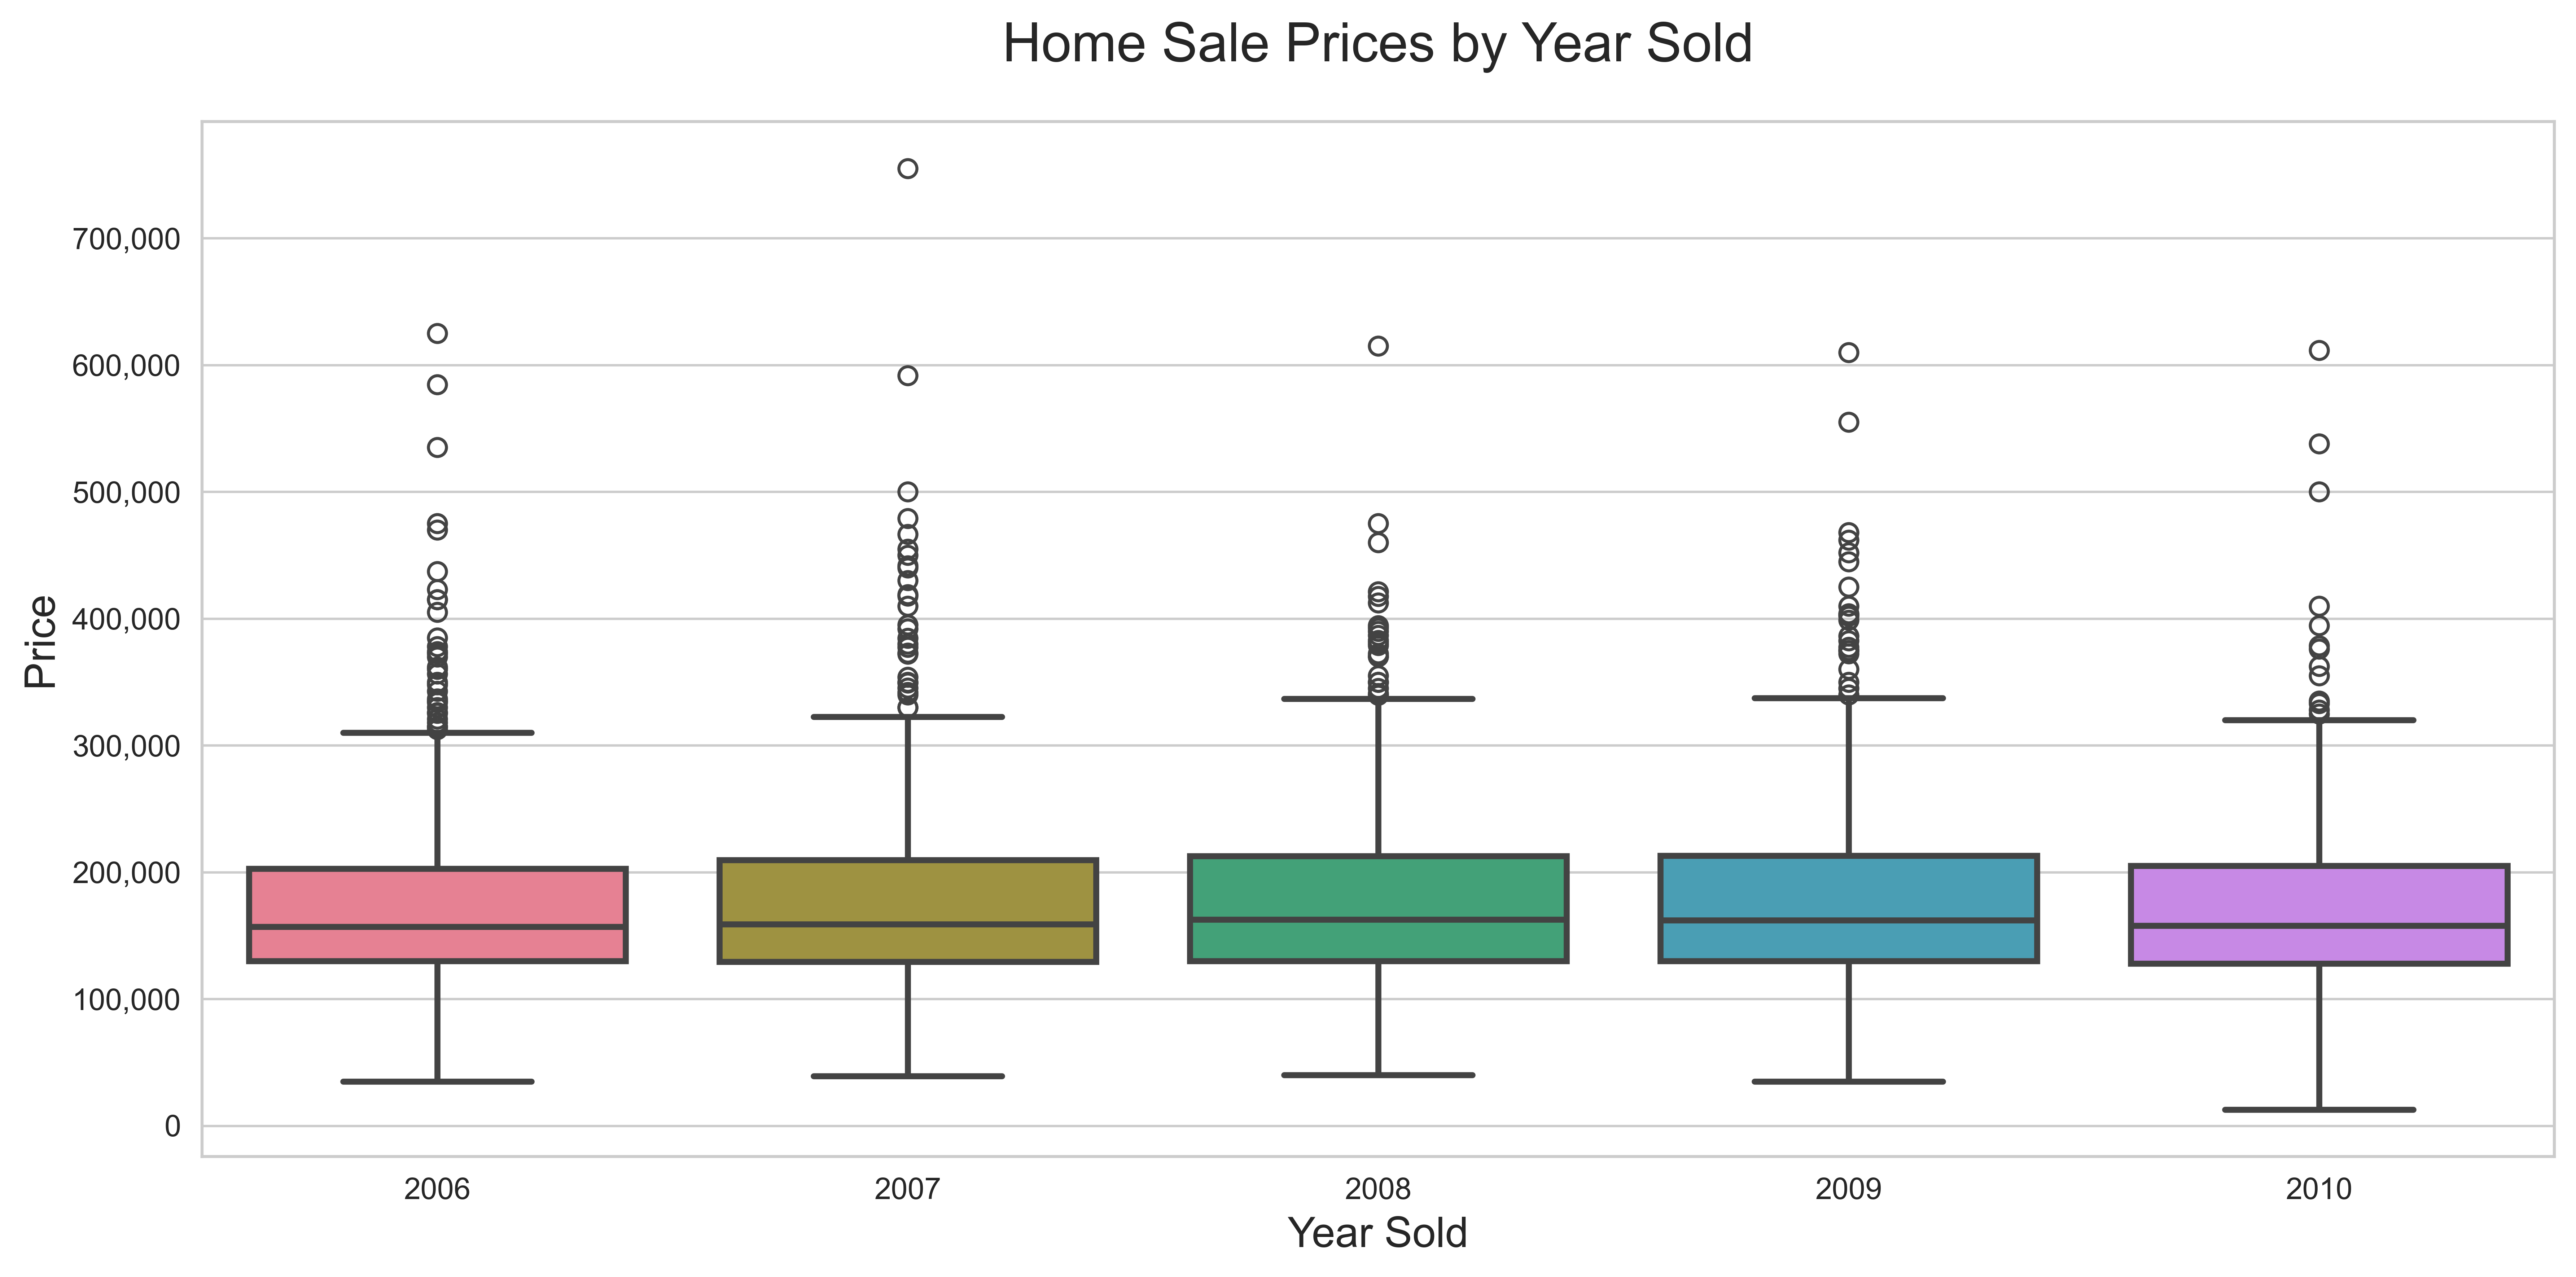

In [22]:
#Annual Box Plots
AmesTS = Ames.copy()
AmesTS['YrSold'] = AmesTS['YrSold'].astype('category')

sns.set_style('whitegrid')
palette = sns.color_palette("husl", len(AmesTS['YrSold'].cat.categories))

plt.figure(figsize=(12, 6), dpi=600)
sns.boxplot(x='YrSold', y='SalePrice', hue='YrSold', data=AmesTS, palette=palette, linewidth=2, fliersize=6, legend=False)
plt.title('Home Sale Prices by Year Sold', fontsize=18, pad=20)
plt.xlabel('Year Sold', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{y:,.0f}'))

plt.tight_layout()
plt.show()

In [23]:
#Custom Histogram KDE Function
def custom_kde(frame_name, col_name):
    
    sns.set_style('whitegrid')   

    #Calculate Mean, Median, Mode
    mean_col = frame_name[col_name].mean()
    median_col = frame_name[col_name].median()
    mode_col = frame_name[col_name].mode().values[0]
     
    #Plotting histogram
    plt.figure(figsize=(14, 7))
    sns.histplot(x=frame_name[col_name], bins=100, kde=True, color='skyblue')
    plt.axvline(mean_col, color='r', linestyle='--', label=f'Mean: {mean_col:,.0f}')
    plt.axvline(median_col, color='g', linestyle='-', label=f'Median: {median_col:,.0f}')
    plt.axvline(mode_col, color='b', linestyle='-.', label=f'Mode: {mode_col:,.0f}')
     
    #Annotations for skewness and kurtosis
    plt.annotate('Skewness: {:.2f}\nKurtosis: {:.2f}'.format(frame_name[col_name].skew(), frame_name[col_name].kurt()),
                 xy=(500000, 100), fontsize=14, bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='aliceblue'))
     
    plt.title(col_name)
    plt.legend()
    plt.xlabel(col_name)
    plt.ylabel('Frequency')
    plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
    plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
    plt.show()

In [24]:
def custom_kde_subplots_2x3(frame_name, col1, col2, col3, col4, col5, col6):
    sns.set_style('whitegrid')
    cols = [col1, col2, col3, col4, col5, col6]

    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()

    for i, col in enumerate(cols):
        ax = axes[i]
        data = frame_name[col].dropna()

        mean_col = data.mean()
        median_col = data.median()
        mode_col = data.mode().iloc[0] if not data.mode().empty else None
        skew_col = data.skew()
        kurt_col = data.kurt()

        #Histogram with KDE
        sns.histplot(data, bins=100, kde=True, color='skyblue', ax=ax)

        #Mean, median, mode lines
        ax.axvline(mean_col, color='r', linestyle='--', label=f'Mean: {mean_col:,.0f}')
        ax.axvline(median_col, color='g', linestyle='-', label=f'Median: {median_col:,.0f}')
        if mode_col is not None:
            ax.axvline(mode_col, color='b', linestyle='-.', label=f'Mode: {mode_col:,.0f}')

        #Skewness & Kurtosis annotation
        ax.annotate(
            f'Skewness: {skew_col:.2f}\nKurtosis: {kurt_col:.2f}',
            xy=(0.98, 0.95), xycoords='axes fraction',
            fontsize=10, ha='right', va='top',
            bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='aliceblue')
        )

        ax.set_title(col, fontsize=13)
        ax.legend(fontsize=9)
        ax.set_xlabel('')
        ax.set_ylabel('Frequency')
        ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:,.0f}'))
        ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{y:,.0f}'))

    #Remove empty subplot if fewer than 6 columns plotted
    for j in range(len(cols), 6):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

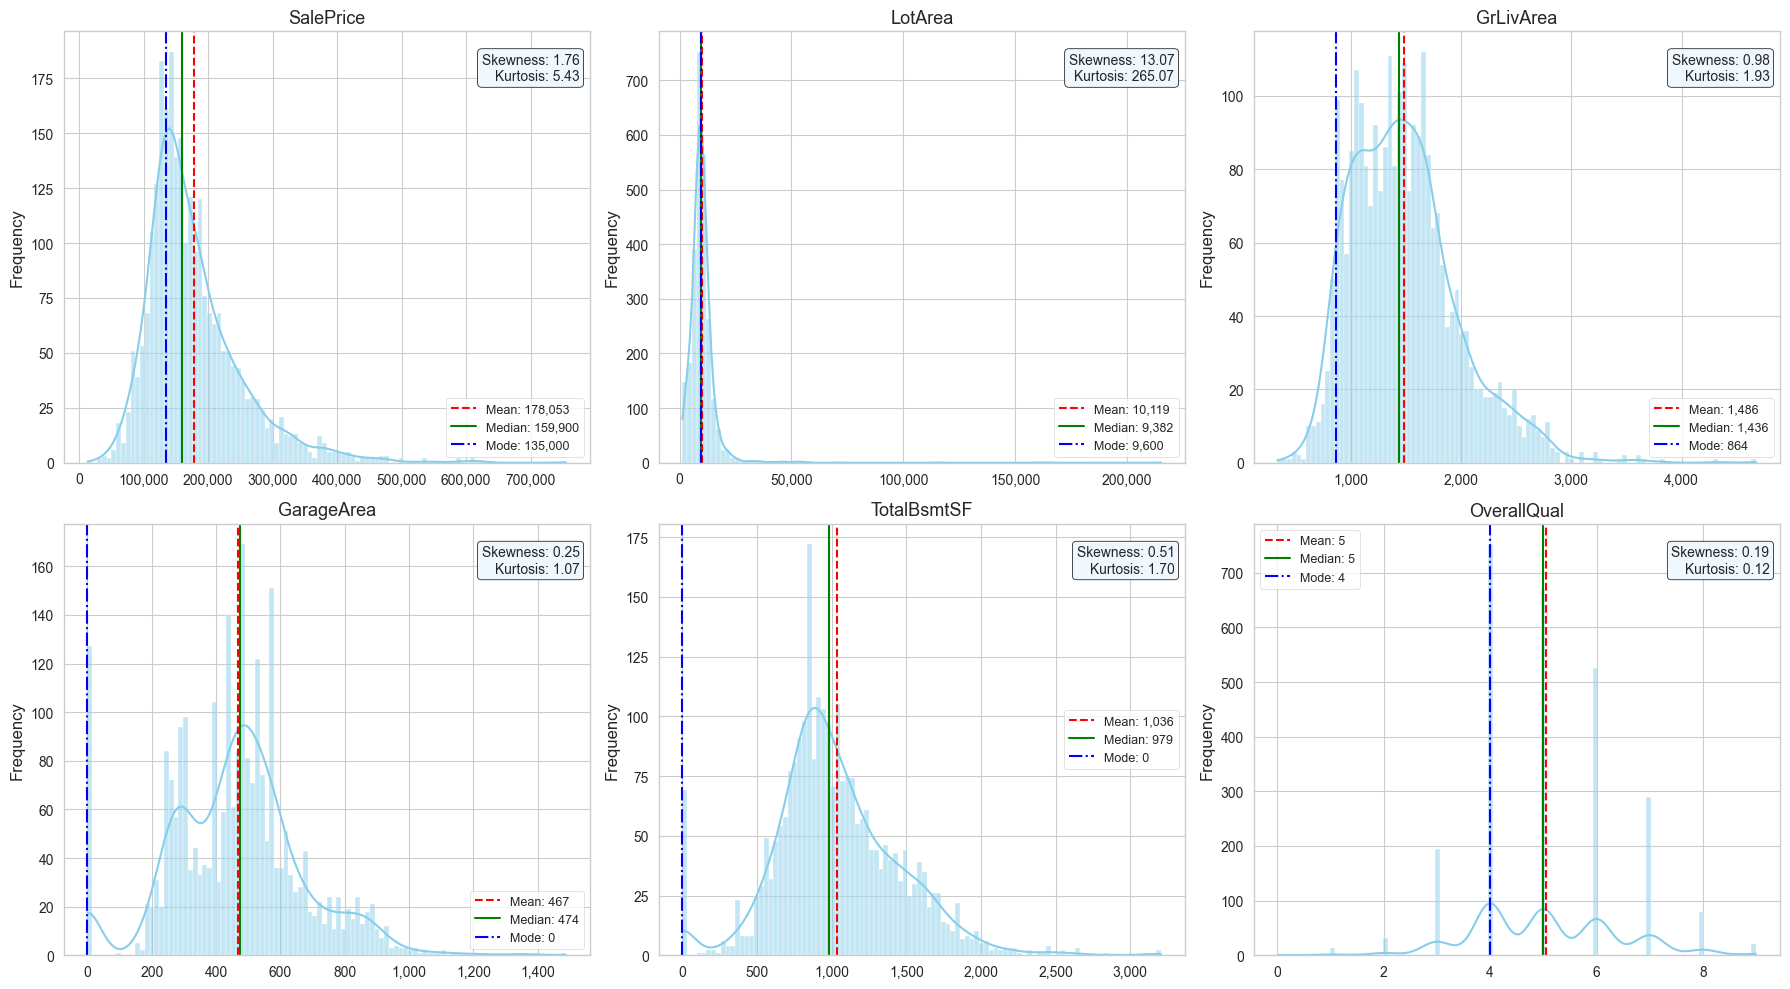

In [25]:
custom_kde_subplots_2x3(Ames, 'SalePrice', 'LotArea', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'OverallQual')

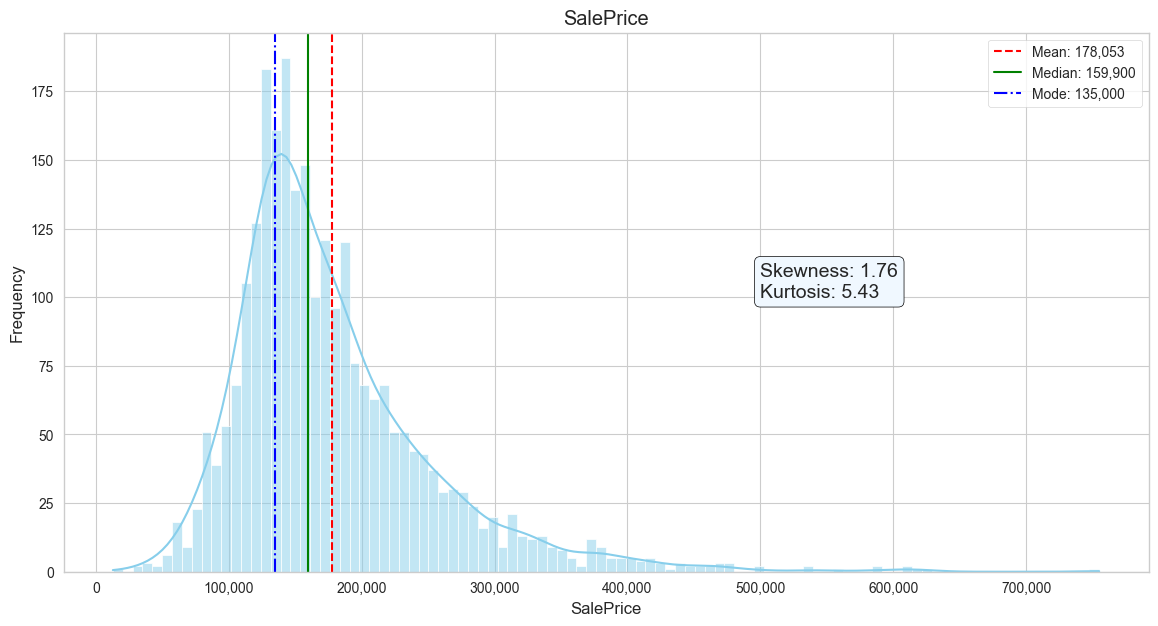

In [26]:
custom_kde(Ames, 'SalePrice')

In [27]:
#custom_kde(Ames, 'GrLivArea')

In [28]:
#custom_kde(Ames, 'LotArea')

In [29]:
#custom_kde(Ames, 'LotArea')

In [30]:
#custom_kde(Ames, 'TotalBsmtSF')

In [31]:
#custom_kde(Ames, 'OverallQual')

In [32]:
#---Linear Model Setup
# Initialize model and KFold
Y = Ames['SalePrice']
lm = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=2)
#Feature sets to evaluate
feature_sets = [
    ['LotArea'],
    ['GrLivArea'],
    ['GarageArea'],
    ['TotalBsmtSF'],
    ['LotArea', 'GrLivArea', 'GarageArea', 'TotalBsmtSF']
]
#Generate & Print Results for each Set
for features in feature_sets:
    print(f'\n--- Features: {features} ---')
    X = Ames[features]
    lm.fit(X, Y)
    r2 = cross_val_score(lm, X, Y, cv=kf, scoring='r2')

    print(f"R² per fold (sorted): {', '.join(f'{score:.4f}' for score in sorted(r2))}")
    print(f'R² Average: {r2.mean():.4f}')
    print(f'Intercept: {lm.intercept_:.2f}')
    print('Coefficients:')
    for name, coef in zip(features, lm.coef_):
        print(f'  {name:<15}: {coef:.4f}')


--- Features: ['LotArea'] ---
R² per fold (sorted): 0.0512, 0.0572, 0.0727, 0.0897, 0.0957
R² Average: 0.0733
Intercept: 152414.92
Coefficients:
  LotArea        : 2.5336

--- Features: ['GrLivArea'] ---
R² per fold (sorted): 0.4719, 0.5219, 0.5254, 0.5277, 0.5352
R² Average: 0.5164
Intercept: 13774.12
Coefficients:
  GrLivArea      : 110.5551

--- Features: ['GarageArea'] ---
R² per fold (sorted): 0.3705, 0.4011, 0.4077, 0.4105, 0.4204
R² Average: 0.4020
Intercept: 70819.93
Coefficients:
  GarageArea     : 229.6955

--- Features: ['TotalBsmtSF'] ---
R² per fold (sorted): 0.3854, 0.3895, 0.4428, 0.4518, 0.4526
R² Average: 0.4244
Intercept: 56946.29
Coefficients:
  TotalBsmtSF    : 116.8607

--- Features: ['LotArea', 'GrLivArea', 'GarageArea', 'TotalBsmtSF'] ---
R² per fold (sorted): 0.6632, 0.7207, 0.7209, 0.7308, 0.7360
R² Average: 0.7143
Intercept: -34043.23
Coefficients:
  LotArea        : 0.2806
  GrLivArea      : 69.0760
  GarageArea     : 92.2134
  TotalBsmtSF    : 61.3348


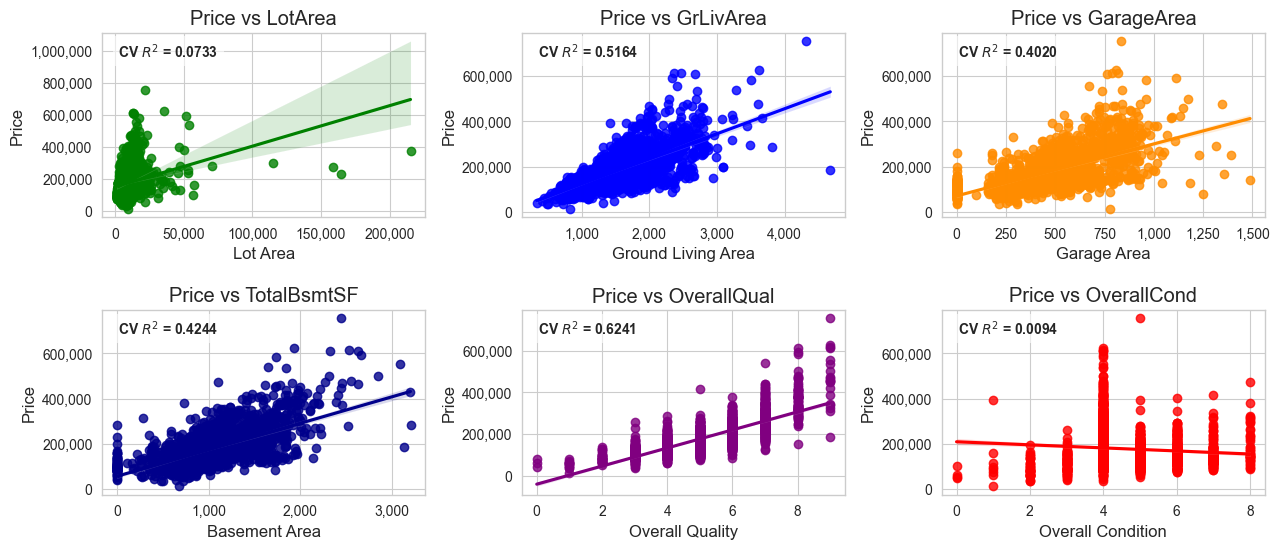

In [33]:
#Price to Feature Scatter Plots with cross-val scores   
def cross_val_r2(x, y, cv=kf):
    model = LinearRegression()
    scores = cross_val_score(model, x.values.reshape(-1, 1), y, cv=cv, scoring='r2')
    return scores.mean()

features = [
    ('LotArea', 'green', 'Lot Area'),
    ('GrLivArea', 'blue', 'Ground Living Area'),
    ('GarageArea', 'darkorange', 'Garage Area'),
    ('TotalBsmtSF', 'darkblue', 'Basement Area'),
    ('OverallQual', 'purple', 'Overall Quality'),
    ('OverallCond', 'red', 'Overall Condition')
]

fig, ax = plt.subplots(2, 3, figsize=(15, 6))
for i, (feature, color, label) in enumerate(features):
    row, col = divmod(i, 3)
    sns.regplot(x=feature, y='SalePrice', data=Ames, ax=ax[row, col], color=color)
    
    #Format axes
    ax[row, col].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:,.0f}'))
    ax[row, col].yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{y:,.0f}'))
    
    #Title and label
    ax[row, col].set_title(f'Price vs {feature}')
    ax[row, col].set_xlabel(label)
    ax[row, col].set_ylabel('Price')

    #Compute Score and add to Top Left
    r2_cv = cross_val_r2(Ames[feature], Ames['SalePrice'])
    ax[row, col].text(
        0.05, 0.95,
        f'CV $R^2$ = {r2_cv:.4f}',
        transform=ax[row, col].transAxes,
        fontsize=10,
        fontweight='bold',
        va='top',
        ha='left',
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
    )

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [34]:
#Log Transform Select Columns in Ames
Ames_Log = np.log10(Ames[['SalePrice', 'LotArea', 'GrLivArea', 'GarageArea', 'TotalBsmtSF']] + 1)

In [35]:
#LOG Linear Model Setup
lm_log = LinearRegression()

feature_sets = [
    ['LotArea'],
    ['GrLivArea'],
    ['GarageArea'],
    ['TotalBsmtSF'],
    ['LotArea', 'GrLivArea', 'GarageArea', 'TotalBsmtSF']
]

for features in feature_sets:
    print(f'\n-- Features: {features} --')
    X = Ames[features]
    X_log = np.log10(X + 1)
    Y_log = np.log10(Y + 1)
    lm_log.fit(X_log, Y_log)
    r2 = cross_val_score(lm_log, X_log, Y_log, cv=kf, scoring='r2')

    print(f"R² per fold (sorted): {', '.join(f'{score:.4f}' for score in sorted(r2))}")
    print(f'R² Average: {r2.mean():.4f}')
    print(f'Intercept: {lm_log.intercept_:.2f}')
    print('Coefficients:')
    for name, coef in zip(features, lm_log.coef_):
        print(f'  {name:<15}: {coef:.4f}')


-- Features: ['LotArea'] --
R² per fold (sorted): 0.1187, 0.1280, 0.1365, 0.1478, 0.1765
R² Average: 0.1415
Intercept: 4.10
Coefficients:
  LotArea        : 0.2821

-- Features: ['GrLivArea'] --
R² per fold (sorted): 0.4986, 0.5323, 0.5433, 0.5470, 0.5768
R² Average: 0.5396
Intercept: 2.44
Coefficients:
  GrLivArea      : 0.8818

-- Features: ['GarageArea'] --
R² per fold (sorted): 0.1702, 0.1826, 0.1855, 0.1993, 0.2011
R² Average: 0.1877
Intercept: 4.91
Coefficients:
  GarageArea     : 0.1220

-- Features: ['TotalBsmtSF'] --
R² per fold (sorted): 0.1081, 0.1212, 0.1312, 0.1457, 0.1823
R² Average: 0.1377
Intercept: 4.86
Coefficients:
  TotalBsmtSF    : 0.1229

-- Features: ['LotArea', 'GrLivArea', 'GarageArea', 'TotalBsmtSF'] --
R² per fold (sorted): 0.5990, 0.6422, 0.6574, 0.6620, 0.6764
R² Average: 0.6474
Intercept: 2.29
Coefficients:
  LotArea        : 0.0816
  GrLivArea      : 0.7143
  GarageArea     : 0.0587
  TotalBsmtSF    : 0.0707


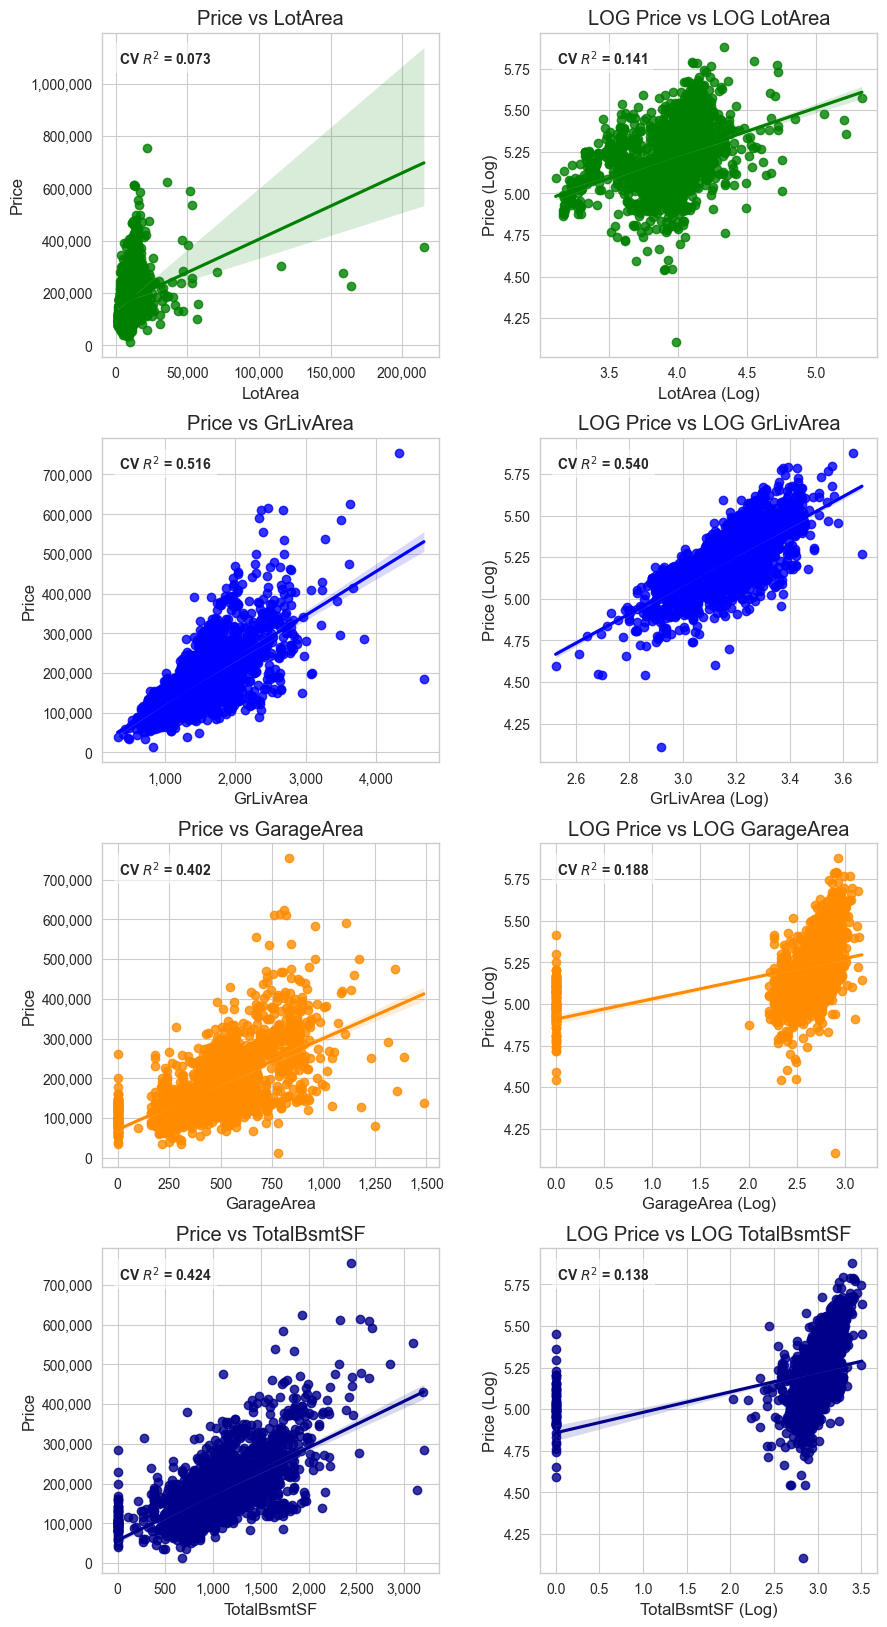

In [36]:
#Regression Plots with cross-val scores
def cross_val_r2(x, y, cv=kf):
    model = LinearRegression()
    scores = cross_val_score(model, x.values.reshape(-1, 1), y, cv=cv, scoring='r2')
    return scores.mean()

def cross_val_r2_log(x, y, cv=kf):
    model = LinearRegression()
    x_log = np.log10(x.values.reshape(-1, 1) + 1)
    y_log = np.log10(y + 1)
    scores = cross_val_score(model, x_log, y_log, cv=cv, scoring='r2')
    return scores.mean()

features = ['LotArea', 'GrLivArea', 'GarageArea', 'TotalBsmtSF']
colors = ['green', 'blue', 'darkorange', 'darkblue']

#Side by Side Sub Plots
fig, ax = plt.subplots(4, 2, figsize=(10, 20))
Y = Ames['SalePrice']

for i, feat in enumerate(features):
    #Linear Plot
    sns.regplot(x=feat, y='SalePrice', data=Ames, ax=ax[i, 0], color=colors[i])
    ax[i, 0].set_title(f'Price vs {feat}')
    ax[i, 0].set_xlabel(feat)
    ax[i, 0].set_ylabel('Price')
    ax[i, 0].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:,.0f}'))
    ax[i, 0].yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{y:,.0f}'))

    #linear Score
    r2_linear = cross_val_r2(Ames[feat], Y)
    ax[i, 0].text(
        0.05, 0.95,  # <-- top-left corner
        f'CV $R^2$ = {r2_linear:.3f}',
        transform=ax[i, 0].transAxes,
        fontsize=10, fontweight='bold',
        va='top', ha='left',
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
    )

    #Log–Log Plot
    sns.regplot(x=feat, y='SalePrice', data=Ames_Log, ax=ax[i, 1], color=colors[i])
    ax[i, 1].set_title(f'LOG Price vs LOG {feat}')
    ax[i, 1].set_xlabel(f'{feat} (Log)')
    ax[i, 1].set_ylabel('Price (Log)')

    #log–log Score
    r2_log = cross_val_r2_log(Ames[feat], Y)
    ax[i, 1].text(
        0.05, 0.95,
        f'CV $R^2$ = {r2_log:.3f}',
        transform=ax[i, 1].transAxes,
        fontsize=10, fontweight='bold',
        va='top', ha='left',
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
    )

plt.subplots_adjust(hspace=0.25, wspace=0.3)
plt.show()

In [37]:
corr_matrix = Ames_Columns_Numeric.corr()

#Avoid duplicates by keeping upper triangle only
upper_tri = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
corr_pairs = (corr_matrix.where(upper_tri).abs().unstack().dropna().sort_values(ascending=False))

print('Top Correlated Feature Pairs:')
corr_pairs_df = corr_pairs.reset_index()
corr_pairs_df.columns = ['Feature 1', 'Feature 2', 'Correlation']
corr_pairs_df['Correlation'] = corr_pairs_df['Correlation']
corr_pairs_df.head(20).style.format({'Correlation': '{:.2f}'})

Top Correlated Feature Pairs:


,Feature 1,Feature 2,Correlation
0,GarageCars,GarageArea,0.89
1,YearBuilt,GarageYrBlt,0.85
2,TotRmsAbvGrd,GrLivArea,0.81
3,TotalBsmtSF,1stFlrSF,0.78
4,LotFrontage,LotArea,0.70
5,TotRmsAbvGrd,BedroomAbvGr,0.69
6,GrLivArea,2ndFlrSF,0.66
7,GrLivArea,FullBath,0.64
8,BsmtFullBath,BsmtFinSF1,0.63
9,HalfBath,2ndFlrSF,0.62


In [38]:
#Drop duplicate columns
Ames_vif_data = Ames_Columns_Numeric_Ordinal.loc[:, ~Ames_Columns_Numeric_Ordinal.columns.duplicated()].copy()

#Remove columns with zero variance
Ames_vif_data = Ames_vif_data.loc[:, Ames_vif_data.std() > 0]  

#VIF table
vif_df = pd.DataFrame({
    "Feature": Ames_vif_data.columns,
    "VIF": [
        variance_inflation_factor(Ames_vif_data.values, i)
        for i in range(Ames_vif_data.shape[1])
    ]
})

#Replace infinity values with NaN
vif_df.replace([np.inf, -np.inf], np.nan, inplace=True)
vif_df = vif_df.sort_values("VIF", ascending=False).reset_index(drop=True)

print('\nVariance Inflation Factors (Top 20):')
display(vif_df.head(20))

C:\Users\edjwe\pyenv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



Variance Inflation Factors (Top 20):


,Feature,VIF
0,YrSold,"37,269"
1,YearBuilt,"29,958"
2,GarageYrBlt,"29,268"
3,YearRemodAdd,"25,008"
4,Utilities,"1,332"
5,GarageCond,171
6,GarageQual,163
7,Functional,104
8,TotRmsAbvGrd,83
9,Electrical,76


In [39]:
def plot_feature_group_heatmaps(data, feature_groups, n_cols=2, n_rows=None, figsize=None, cmap='coolwarm', annot=True, cbar=True, round_decimals=2):
    n_groups = len(feature_groups)
    
    if n_rows is None:
        n_rows = int(np.ceil(n_groups / n_cols))
    if figsize is None:
        figsize = (n_cols * 6, n_rows * 6)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = np.array(axes).flatten()

    for i, (group_name, columns) in enumerate(feature_groups.items()):
        subset = data[columns].select_dtypes(include=['number']).copy()
        if subset.empty:
            axes[i].set_visible(False)
            continue
        corr = subset.corr().round(round_decimals)
        sns.heatmap(corr, cmap=cmap, ax=axes[i], annot=annot, fmt=f'.{round_decimals}f', cbar=cbar, square=True, linewidths=0.5, vmin=-1, vmax=1)
        axes[i].set_title(f'{group_name} Correlation Heatmap', fontsize=12, pad=10)
        axes[i].tick_params(labelrotation=45)

    #Unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

In [40]:
Heatmap_Groups = {
    'Living Area Features': ['GrLivArea', 'LowQualFinSF', '1stFlrSF', '2ndFlrSF', 'KitchenAbvGr', 'TotRmsAbvGrd', 'BedroomAbvGr',  'FullBath', 'HalfBath', 'Fireplaces'],
    'Garage Features': ['GarageArea', 'GarageCars'],
    'Basement Features': ['TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath'],
    'Outside Features': ['LotArea', 'LotFrontage', 'MasVnrArea', 'PoolArea', 'WoodDeckSF', 'EnclosedPorch', 'ScreenPorch'],
    'Size Features': ['LotArea', 'LotFrontage', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'MasVnrArea', 'PoolArea', 'WoodDeckSF'],
    'Age Features': ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt'],
}

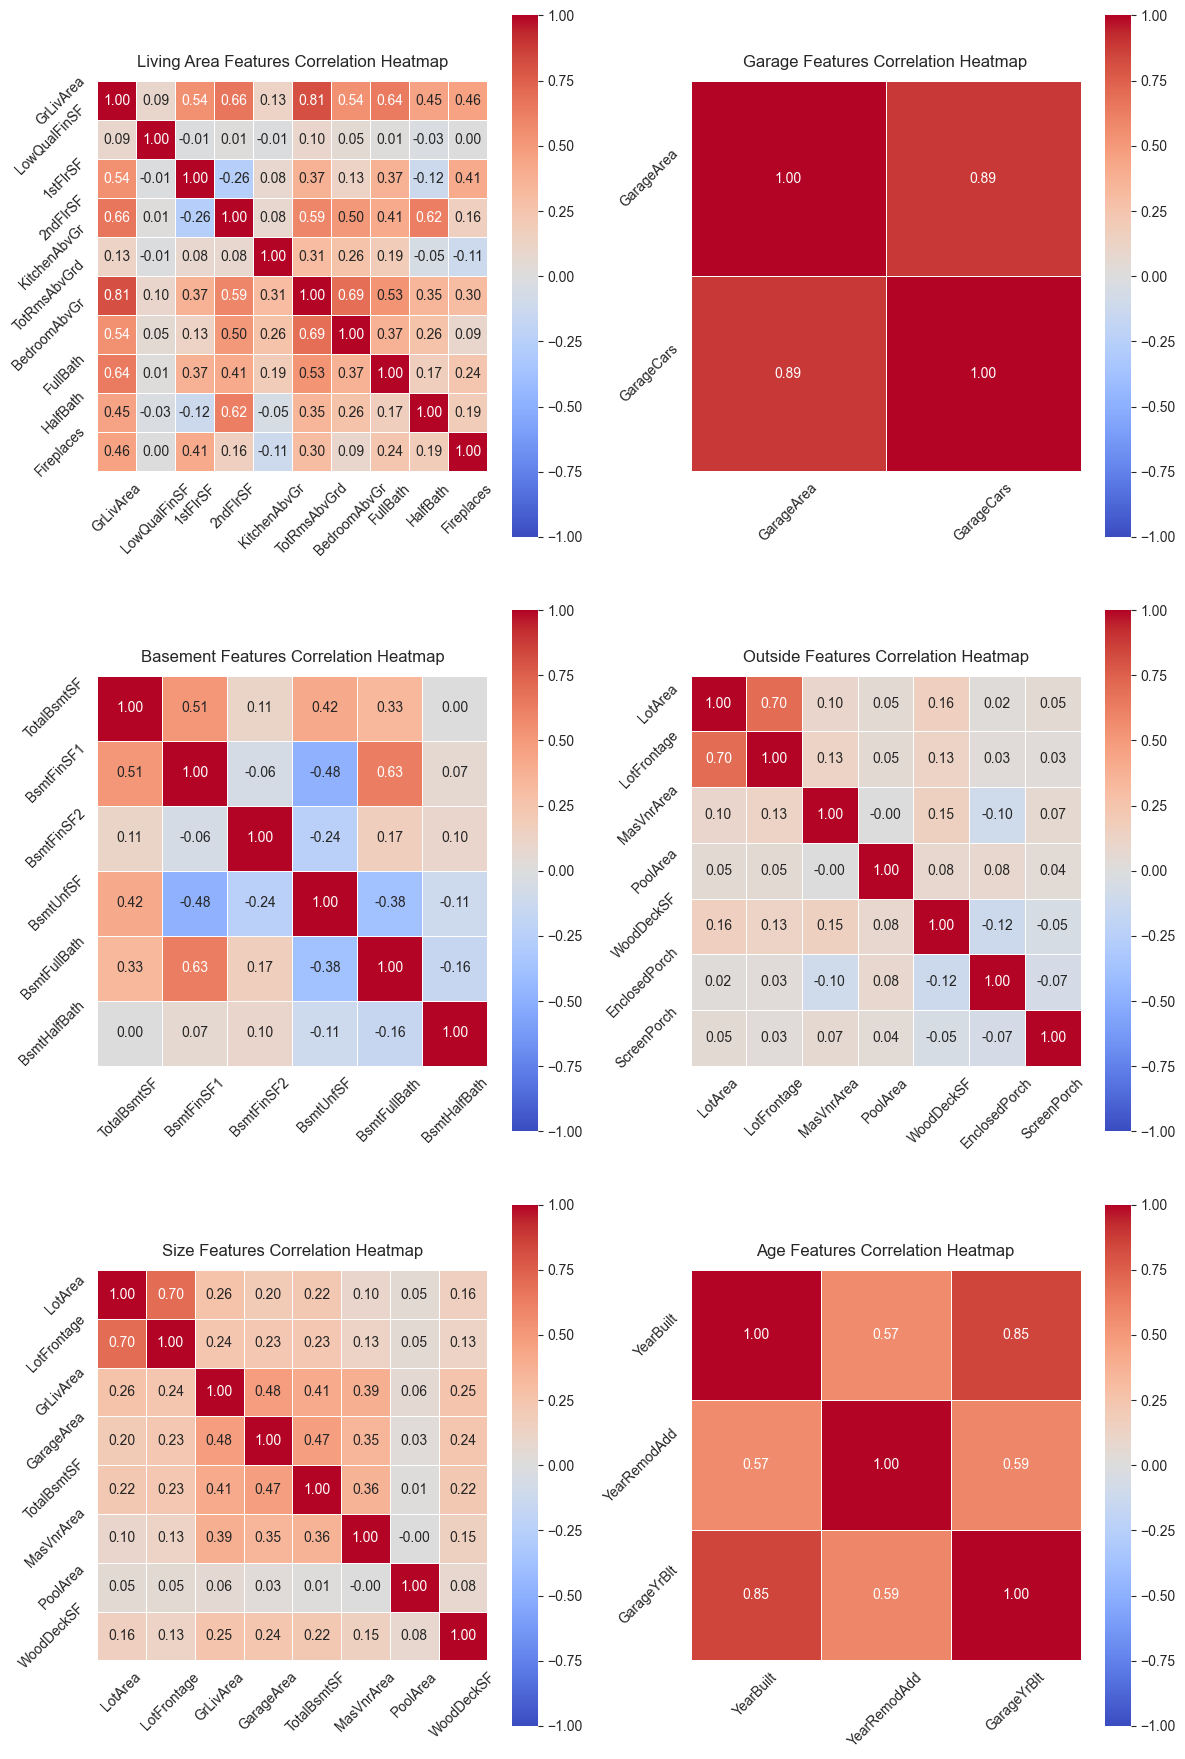

In [41]:
plot_feature_group_heatmaps(Ames, Heatmap_Groups, 2, 3)

SFS with NUMERIC Columns Only
Top 5 Features & Individual Performance (R²)
Feature: GrLivArea            Mean CV Score: 0.5127
Feature: TotalBsmtSF          Mean CV Score: 0.4064
Feature: GarageCars           Mean CV Score: 0.3970
Feature: 1stFlrSF             Mean CV Score: 0.3957
Feature: GarageArea           Mean CV Score: 0.3939

Mean CV Score for MLR Model w Top 5 Features: 0.7177

Top 5 Feature Combination selected by SFS: ['BedroomAbvGr', 'BsmtFinSF1', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt']
Mean CV Score using SFS (n=5): 0.7842



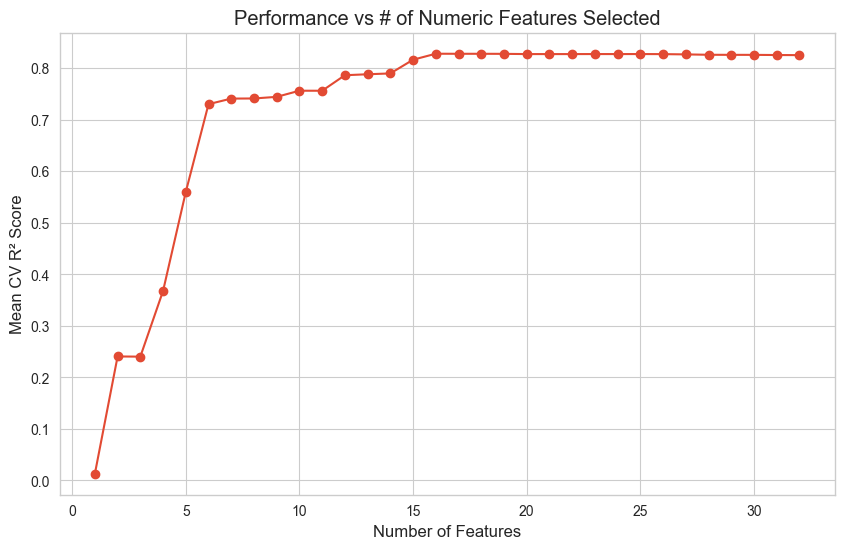


Optimal Number of Selected Features: 16
Optimal Selected Features: ['BedroomAbvGr', 'BsmtFinSF1', 'BsmtFullBath', 'Fireplaces', 'GarageArea', 'GrLivArea', 'KitchenAbvGr', 'LotArea', 'LowQualFinSF', 'MasVnrArea', 'ScreenPorch', 'TotalBsmtSF', 'TotRmsAbvGrd', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd']
Mean CV Score using SFS (n=5, tol=0.005): 0.8284


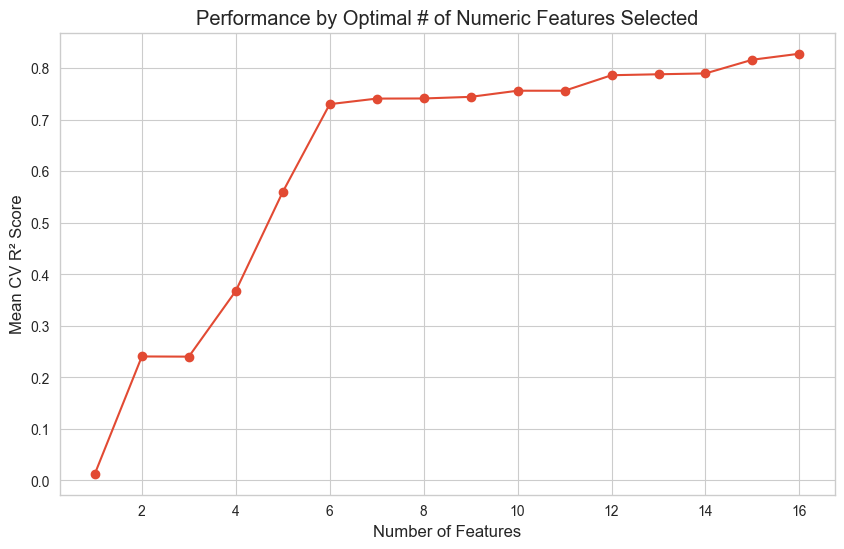

In [42]:
#Numeric Only SFS
X = Ames_Columns_Numeric
lm = LinearRegression()
feature_scores_MLR_numeric = {}

# CV Evaluation by Feature
for feature in X.columns:
    X_single = X[[feature]]
    cv_scores = cross_val_score(lm, X_single, Y)
    feature_scores_MLR_numeric[feature] = cv_scores.mean()

# Identify Top 5 features (based on mean CV R² scores)
sorted_features_MLR_numeric = sorted(feature_scores_MLR_numeric.items(), key=lambda item: item[1], reverse=True)
top_5_MLR_numeric = sorted_features_MLR_numeric[0:5]
 
# Display Top 5 features & their performance
print('SFS with NUMERIC Columns Only')
print('Top 5 Features & Individual Performance (R²)')
for feature, score in top_5_MLR_numeric:
    print(f'Feature: {feature:<20} Mean CV Score: {score:.4f}')
	
#-----------------------------------------------------------------------------------------------
top_features_MLR_numeric = [feature for feature, score in top_5_MLR_numeric]  # Extract Top 5 Features for MLR
X_top_MLR_numeric = Ames[top_features_MLR_numeric]   # Model with Top 5 features
 
# CV Evaluation
cv_scores_mlr_MLR_numeric = cross_val_score(lm, X_top_MLR_numeric, Y, cv=5, scoring='r2')
mean_mlr_score_MLR_numeric = cv_scores_mlr_MLR_numeric.mean()
print(f'\nMean CV Score for MLR Model w Top 5 Features: {mean_mlr_score_MLR_numeric:.4f}')

#-----------------------------------------------------------------------------------------------
# Top 5 Feature Combination with Score
sfs = SequentialFeatureSelector(lm, n_features_to_select=5)
sfs.fit(X, Y)
selected_features_MLR_numeric = X.columns[sfs.get_support()].to_list()
scores = cross_val_score(lm, Ames[selected_features_MLR_numeric], Y)

print(f'\nTop 5 Feature Combination selected by SFS: {selected_features_MLR_numeric}')
print(f'Mean CV Score using SFS (n=5): {scores.mean():.4f}\n')

#-----------------------------------------------------------------------------------------------
# Efficient loop: Mean CV Scores for 1 to all numeric features
mean_scores_MLR_numeric = []

# Fit SFS once for full feature selection
sfs_full = SequentialFeatureSelector(lm, n_features_to_select='auto')
sfs_full.fit(X, Y)
mask_full = sfs_full.get_support()
selected_full = X.columns[mask_full]

# Incrementally evaluate subsets of features
for n in range(1, len(X.columns)):
    if n <= len(selected_full):
        subset_features = selected_full[:n]
    else:
        remaining_features = [f for f in X.columns if f not in selected_full]
        subset_features = list(selected_full) + remaining_features[: n - len(selected_full)]
    
    score = cross_val_score(lm, X[subset_features], Y, cv=5, scoring='r2').mean()
    mean_scores_MLR_numeric.append(score)

# Plot Mean CV Scores against # of Features
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(X.columns)), mean_scores_MLR_numeric, marker='o')
plt.title('Performance vs # of Numeric Features Selected')
plt.xlabel('Number of Features')
plt.ylabel('Mean CV R² Score')
plt.grid(True)
plt.show()

#-----------------------------------------------------------------------------------------------
# Efficient SFS with tolerance level 0.005
sfs_tol = SequentialFeatureSelector(lm, n_features_to_select='auto', tol=0.00004)
sfs_tol.fit(X, Y)
mask_tol = sfs_tol.get_support()
selected_tol = X.columns[mask_tol]
n_features_selected = sum(mask_tol)

# Incrementally evaluate CV scores using tolerance-based selection
mean_scores_tol_MLR_numeric = []
for n in range(1, n_features_selected + 1):
    subset_features = selected_tol[:n]
    score = cross_val_score(lm, X[subset_features], Y, cv=5, scoring='r2').mean()
    mean_scores_tol_MLR_numeric.append(score)
scores_tol_MLR_numeric = cross_val_score(lm, X[subset_features], Y, cv=5, scoring='r2')

# Print selected Features & Performance
print(f'\nOptimal Number of Selected Features: {n_features_selected}')
print(f'Optimal Selected Features: {selected_tol.tolist()}')
print(f'Mean CV Score using SFS (n=5, tol=0.005): {mean_scores_tol_MLR_numeric[-1]:.4f}')
Ames_MLR_Optimal_Numeric_Column_List = selected_tol.tolist()

# Plot Mean CV Scores for each # of features selected
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_features_selected + 1), mean_scores_tol_MLR_numeric, marker='o')
plt.title('Performance by Optimal # of Numeric Features Selected')
plt.xlabel('Number of Features')
plt.ylabel('Mean CV R² Score')
plt.grid(True)
plt.show()

SFS with ORDINAL Columns Only
Top 5 Features & Individual Performance (R²)
Feature: OverallQual          Mean CV Score: 0.6183
Feature: ExterQual            Mean CV Score: 0.4518
Feature: KitchenQual          Mean CV Score: 0.4127
Feature: BsmtQual             Mean CV Score: 0.3297
Feature: GarageFinish         Mean CV Score: 0.2723

Mean CV Score for MLR Model w Top 5 Features: 0.6761

Top 5 Feature Combination selected by SFS: ['BsmtExposure', 'ExterQual', 'FireplaceQu', 'KitchenQual', 'OverallQual']
Mean CV Score using SFS (n=5): 0.7078



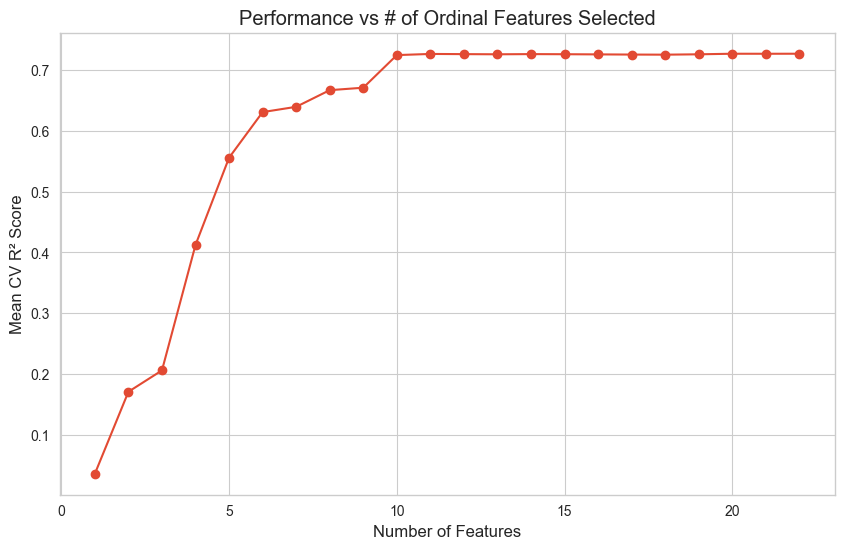


Optimal Number of Selected Features: 12
Optimal Selected Features: ['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'ExterQual', 'FireplaceQu', 'GarageFinish', 'KitchenQual', 'LandSlope', 'LotShape', 'OverallQual', 'PoolQC']
Mean CV Score using SFS (tol=0.005): 0.7270


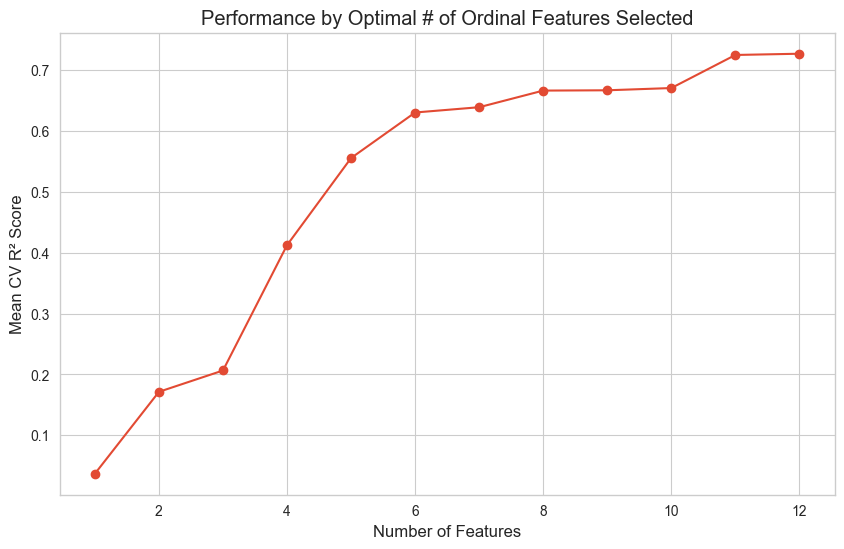

In [43]:
#Ordinal Only SFS
X = Ames_Columns_Ordinal
lm = LinearRegression()
feature_scores_MLR_ordinal = {}

#CV Evaluation by Feature
for feature in X.columns:
    X_single = X[[feature]]
    cv_scores = cross_val_score(lm, X_single, Y)
    feature_scores_MLR_ordinal[feature] = cv_scores.mean()
 
#Identify Top 5 features (based on mean CV R² scores)
sorted_features_MLR_ordinal = sorted(feature_scores_MLR_ordinal.items(), key=lambda item: item[1], reverse=True)
top_5_MLR_ordinal = sorted_features_MLR_ordinal[0:5]
 
#Display Top 5 features & their performance
print('SFS with ORDINAL Columns Only')
print('Top 5 Features & Individual Performance (R²)')
for feature, score in top_5_MLR_ordinal:
    print(f'Feature: {feature:<20} Mean CV Score: {score:.4f}')
	
#-----------------------------------------------------------------------------------------------
top_features_MLR_ordinal = [feature for feature, score in top_5_MLR_ordinal]  # Extract Top 5 Features for MLR
X_top_MLR_ordinal = Ames[top_features_MLR_ordinal]   # Model with Top 5 features
 
# CV Evaluation
cv_scores_mlr_MLR_ordinal = cross_val_score(lm, X_top_MLR_ordinal, Y, cv=5, scoring='r2')
mean_mlr_score_MLR_ordinal = cv_scores_mlr_MLR_ordinal.mean()
print(f'\nMean CV Score for MLR Model w Top 5 Features: {mean_mlr_score_MLR_ordinal:.4f}')

#-----------------------------------------------------------------------------------------------
#Top 5 Feature Combination with Score
sfs = SequentialFeatureSelector(lm, n_features_to_select=5)
sfs.fit(X, Y)
selected_features_MLR_ordinal = X.columns[sfs.get_support()].to_list()
scores = cross_val_score(lm, Ames[selected_features_MLR_ordinal], Y)

print(f'\nTop 5 Feature Combination selected by SFS: {selected_features_MLR_ordinal}')
print(f'Mean CV Score using SFS (n=5): {scores.mean():.4f}\n')

#-----------------------------------------------------------------------------------------------
#Efficient loop: Mean CV Scores for 1 to all ordinal features
mean_scores_MLR_ordinal = []

#Fit SFS once for full feature selection
sfs_full = SequentialFeatureSelector(lm, n_features_to_select='auto')
sfs_full.fit(X, Y)
mask_full = sfs_full.get_support()
selected_full = X.columns[mask_full]

#Evaluate subsets of features
for n in range(1, len(X.columns)):
    if n <= len(selected_full):
        subset_features = selected_full[:n]
    else:
        remaining_features = [f for f in X.columns if f not in selected_full]
        subset_features = list(selected_full) + remaining_features[: n - len(selected_full)]
    
    score = cross_val_score(lm, X[subset_features], Y, cv=5, scoring='r2').mean()
    mean_scores_MLR_ordinal.append(score)

#Plot Mean CV Scores against # of Features
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(X.columns)), mean_scores_MLR_ordinal, marker='o')
plt.title('Performance vs # of Ordinal Features Selected')
plt.xlabel('Number of Features')
plt.ylabel('Mean CV R² Score')
plt.grid(True)
plt.show()

#-----------------------------------------------------------------------------------------------
#SFS with tolerance level
sfs_tol = SequentialFeatureSelector(lm, n_features_to_select='auto', tol=0.0008)
sfs_tol.fit(X, Y)
mask_tol = sfs_tol.get_support()
selected_tol = X.columns[mask_tol]
n_features_selected = sum(mask_tol)

#Evaluate subsets of features
mean_scores_tol_MLR_ordinal = []
for n in range(1, n_features_selected + 1):
    subset_features = selected_tol[:n]
    score = cross_val_score(lm, X[subset_features], Y, cv=5, scoring='r2').mean()
    mean_scores_tol_MLR_ordinal.append(score)

#Print selected Features & Performance
print(f'\nOptimal Number of Selected Features: {n_features_selected}')
print(f'Optimal Selected Features: {selected_tol.tolist()}')
print(f'Mean CV Score using SFS (tol=0.005): {mean_scores_tol_MLR_ordinal[-1]:.4f}')

#Plot Mean CV Scores for each # of features selected
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_features_selected + 1), mean_scores_tol_MLR_ordinal, marker='o')
plt.title('Performance by Optimal # of Ordinal Features Selected')
plt.xlabel('Number of Features')
plt.ylabel('Mean CV R² Score')
plt.grid(True)
plt.show()

SFS with NUMERIC & ORDINAL Columns
Top 5 Features & Individual Performance (R²)
Feature: OverallQual          Mean CV Score: 0.6183
Feature: GrLivArea            Mean CV Score: 0.5127
Feature: ExterQual            Mean CV Score: 0.4518
Feature: KitchenQual          Mean CV Score: 0.4127
Feature: TotalBsmtSF          Mean CV Score: 0.4064

Mean CV Score for MLR Model w Top 5 Features: 0.8106

Top 5 Feature Combination selected by SFS: ['1stFlrSF', 'BsmtFinSF1', 'GrLivArea', 'ExterQual', 'OverallQual']
Mean CV Score using SFS (n=5): 0.8318



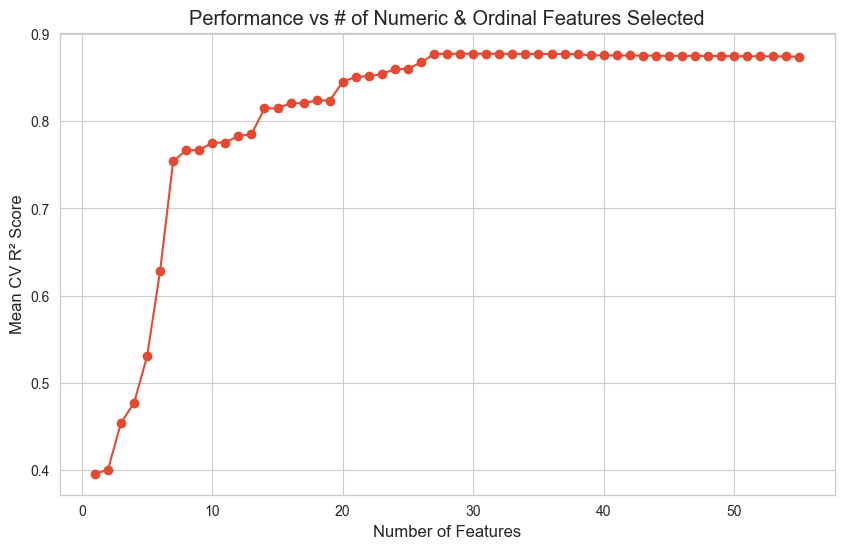


Optimal Number of Selected Features: 29
Optimal Selected Features: ['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtUnfSF', 'Fireplaces', 'GarageArea', 'GrLivArea', 'KitchenAbvGr', 'LotArea', 'MasVnrArea', 'ScreenPorch', 'TotalBsmtSF', 'TotRmsAbvGrd', 'YearBuilt', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'Electrical', 'ExterQual', 'Functional', 'GarageCond', 'HeatingQC', 'KitchenQual', 'LotShape', 'OverallCond', 'OverallQual', 'PoolQC']
Mean CV Score using SFS (tol=0.005): 0.8774


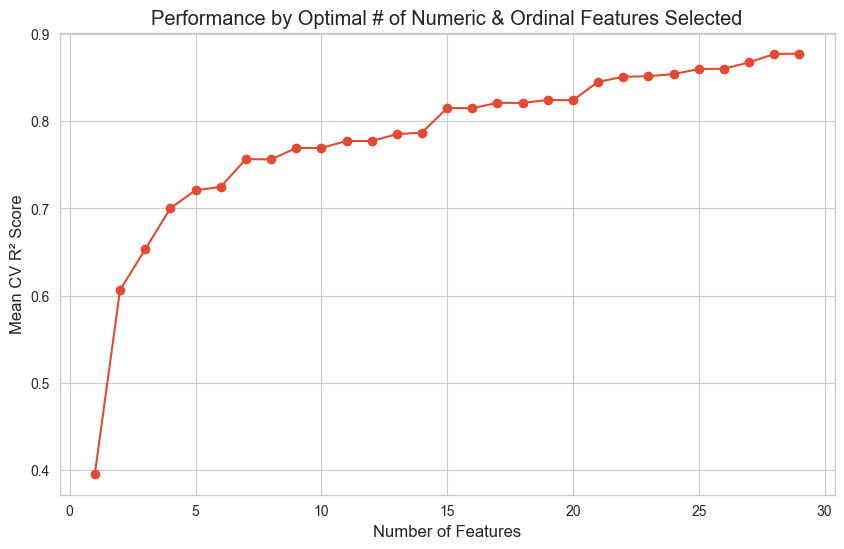

In [44]:
#Numeric & Ordinal SFS
X = Ames_Columns_Numeric_Ordinal
lm = LinearRegression()
feature_scores_MLR_numeric_ordinal = {}

#CV Evaluation by Feature
for feature in X.columns:
    X_single = X[[feature]]
    cv_scores = cross_val_score(lm, X_single, Y)
    feature_scores_MLR_numeric_ordinal[feature] = cv_scores.mean()
 
#Identify Top 5 features (based on mean CV R² scores)
sorted_features_MLR_numeric_ordinal = sorted(feature_scores_MLR_numeric_ordinal.items(), key=lambda item: item[1], reverse=True)
top_5_MLR_numeric_ordinal = sorted_features_MLR_numeric_ordinal[0:5]
 
#Display Top 5 features & their performance
print('SFS with NUMERIC & ORDINAL Columns')
print('Top 5 Features & Individual Performance (R²)')
for feature, score in top_5_MLR_numeric_ordinal:
    print(f'Feature: {feature:<20} Mean CV Score: {score:.4f}')
	
#-----------------------------------------------------------------------------------------------
top_features_MLR_numeric_ordinal = [feature for feature, score in top_5_MLR_numeric_ordinal]  # Extract Top 5 Features for MLR
X_top_MLR_numeric_ordinal = Ames[top_features_MLR_numeric_ordinal]   # Model with Top 5 features
 
#CV Evaluation
cv_scores_mlr_MLR_numeric_ordinal = cross_val_score(lm, X_top_MLR_numeric_ordinal, Y, cv=5, scoring='r2')
mean_mlr_score_MLR_numeric_ordinal = cv_scores_mlr_MLR_numeric_ordinal.mean()
print(f'\nMean CV Score for MLR Model w Top 5 Features: {mean_mlr_score_MLR_numeric_ordinal:.4f}')

#-----------------------------------------------------------------------------------------------
#Top 5 Feature Combination with Score
sfs = SequentialFeatureSelector(lm, n_features_to_select=5)
sfs.fit(X, Y)
selected_features_MLR_numeric_ordinal = X.columns[sfs.get_support()].to_list()
scores = cross_val_score(lm, Ames[selected_features_MLR_numeric_ordinal], Y)

print(f'\nTop 5 Feature Combination selected by SFS: {selected_features_MLR_numeric_ordinal}')
print(f'Mean CV Score using SFS (n=5): {scores.mean():.4f}\n')

#-----------------------------------------------------------------------------------------------
#Mean CV Scores for 1 to all features
mean_scores_MLR_numeric_ordinal = []

# Fit SFS once for full feature selection
sfs_full = SequentialFeatureSelector(lm, n_features_to_select='auto')
sfs_full.fit(X, Y)
mask_full = sfs_full.get_support()
selected_full = X.columns[mask_full]

#Evaluate subsets of features
for n in range(1, len(X.columns)):
    if n <= len(selected_full):
        subset_features = selected_full[:n]
    else:
        remaining_features = [f for f in X.columns if f not in selected_full]
        subset_features = list(selected_full) + remaining_features[: n - len(selected_full)]
    
    score = cross_val_score(lm, X[subset_features], Y, cv=5, scoring='r2').mean()
    mean_scores_MLR_numeric_ordinal.append(score)

# Plot Mean CV Scores against # of Features
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(X.columns)), mean_scores_MLR_numeric_ordinal, marker='o')
plt.title('Performance vs # of Numeric & Ordinal Features Selected')
plt.xlabel('Number of Features')
plt.ylabel('Mean CV R² Score')
plt.grid(True)
plt.show()

#-----------------------------------------------------------------------------------------------
#Efficient SFS with tolerance level
sfs_tol = SequentialFeatureSelector(lm, n_features_to_select='auto', tol=0.00005)
sfs_tol.fit(X, Y)
mask_tol = sfs_tol.get_support()
selected_tol = X.columns[mask_tol]
n_features_selected = sum(mask_tol)

#Incrementally evaluate CV scores using tolerance-based selection
mean_scores_tol_MLR_numeric_ordinal = []
for n in range(1, n_features_selected + 1):
    subset_features = selected_tol[:n]
    score = cross_val_score(lm, X[subset_features], Y, cv=5, scoring='r2').mean()
    mean_scores_tol_MLR_numeric_ordinal.append(score)
scores_tol_MLR_numeric_ordinal = cross_val_score(lm, X[subset_features], Y, cv=5, scoring='r2')

#Print selected Features & Performance
print(f'\nOptimal Number of Selected Features: {n_features_selected}')
print(f'Optimal Selected Features: {selected_tol.tolist()}')
print(f'Mean CV Score using SFS (tol=0.005): {mean_scores_tol_MLR_numeric_ordinal[-1]:.4f}')
Ames_MLR_Optimal_Numeric_Ordinal_Column_List = selected_tol.tolist()

#Plot Mean CV Scores for each # of features selected
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_features_selected + 1), mean_scores_tol_MLR_numeric_ordinal, marker='o')
plt.title('Performance by Optimal # of Numeric & Ordinal Features Selected')
plt.xlabel('Number of Features')
plt.ylabel('Mean CV R² Score')
plt.grid(True)
plt.show()

In [45]:
#OneHotEncode NOMINAL columns
encoder = OneHotEncoder(drop='first', sparse_output=False)
Ames_Nominal_One_Hot = encoder.fit_transform(Ames_Columns_Nominal)
Ames_Nominal_Encoded_df = pd.DataFrame(
    Ames_Nominal_One_Hot,
    columns=encoder.get_feature_names_out(Ames_Columns_Nominal.columns),
    index=Ames.index
)

#--Identify Most Predictive Nominal Features--
lm = LinearRegression()
feature_scores_MLR_OneHot_Nominal = {}

#Evaluate each nominal feature
for feature in Ames_Columns_Nominal.columns:
    encoder = OneHotEncoder(drop="first", sparse_output=False)
    X_encoded = encoder.fit_transform(Ames_Columns_Nominal[[feature]])
    
    #5-fold CV
    scores = cross_val_score(lm, X_encoded, Y, cv=5, scoring='r2')
    mean_score = scores.mean()
    
    #Store both mean and all fold scores
    feature_scores_MLR_OneHot_Nominal[feature] = {
        'mean_r2': mean_score,
        'fold_scores': scores
    }

#Sort features by mean CV Score
sorted_features_MLR_OneHot_Nominal = sorted(
    feature_scores_MLR_OneHot_Nominal.items(),
    key=lambda item: item[1]['mean_r2'],
    reverse=True
)

print(f'\nFeature selected for highest predictability: {sorted_features_MLR_OneHot_Nominal[0][0]}')
print('\nTop 5 Nominal Features (with all 5 CV fold scores):')
for feature, metrics in sorted_features_MLR_OneHot_Nominal[:12]:
    print(f"\n{feature:<25} Mean CV R² = {metrics['mean_r2']:.4f};", f"Fold R² scores: {', '.join([f'{s:.4f}' for s in metrics['fold_scores']])}")


Feature selected for highest predictability: Neighborhood

Top 5 Nominal Features (with all 5 CV fold scores):

Neighborhood              Mean CV R² = 0.5407; Fold R² scores: 0.5444, 0.5741, 0.5362, 0.5410, 0.5075

Foundation                Mean CV R² = 0.2547; Fold R² scores: 0.2798, 0.2800, 0.2316, 0.2599, 0.2221

MSSubClass                Mean CV R² = 0.2298; Fold R² scores: 0.2193, 0.2213, 0.2611, 0.2319, 0.2152

GarageType                Mean CV R² = 0.2264; Fold R² scores: 0.2210, 0.2260, 0.2039, 0.2558, 0.2250

MasVnrType                Mean CV R² = 0.1654; Fold R² scores: 0.1606, 0.1826, 0.1482, 0.1667, 0.1690

Exterior1st               Mean CV R² = 0.1392; Fold R² scores: 0.1545, 0.1318, 0.1394, 0.1247, 0.1458

Exterior2nd               Mean CV R² = 0.1359; Fold R² scores: 0.1609, 0.1203, 0.1441, 0.1200, 0.1342

MSZoning                  Mean CV R² = 0.1029; Fold R² scores: 0.1105, 0.1242, 0.1073, 0.0649, 0.1076

CentralAir                Mean CV R² = 0.0598; Fold R² scores: 

In [46]:
#OneHotEncode ORDINAL columns
encoder = OneHotEncoder(drop='first', sparse_output=False)
Ames_Ordinal_One_Hot = encoder.fit_transform(Ames_Columns_Ordinal)
Ames_Ordinal_Encoded_df = pd.DataFrame(
    Ames_Ordinal_One_Hot,
    columns=encoder.get_feature_names_out(Ames_Columns_Ordinal.columns),
    index=Ames.index
)

#Map each ordinal feature → its encoded columns
ordinal_col_map = {
    feature: [col for col in Ames_Ordinal_Encoded_df.columns if col.startswith(feature + '_')]
    for feature in Ames_Columns_Ordinal.columns
}

#--Identify Most Predictive Ordinal Features--
lm = LinearRegression()
feature_scores_MLR_OneHot_Ordinal = {}

for feature, encoded_cols in ordinal_col_map.items():
    X_encoded = Ames_Ordinal_Encoded_df[encoded_cols]
    scores = cross_val_score(lm, X_encoded, Y, cv=5, scoring='r2')
    feature_scores_MLR_OneHot_Ordinal[feature] = {
        'mean_r2': scores.mean(),
        'fold_scores': scores
    }

sorted_ordinal = sorted(
    feature_scores_MLR_OneHot_Ordinal.items(),
    key=lambda x: x[1]['mean_r2'],
    reverse=True
)

print(f'\nTop ordinal feature: {sorted_ordinal[0][0]}')
for feature, metrics in sorted_ordinal[:15]:
     print(f"\n{feature:<25} Mean CV R² = {metrics['mean_r2']:.4f}; ", f"Fold R² scores: {', '.join(f'{s:.4f}' for s in sorted(metrics['fold_scores']))}")


Top ordinal feature: OverallQual

OverallQual               Mean CV R² = 0.6791;  Fold R² scores: 0.6422, 0.6769, 0.6793, 0.6856, 0.7114

BsmtQual                  Mean CV R² = 0.4651;  Fold R² scores: 0.3888, 0.4386, 0.4716, 0.5096, 0.5169

ExterQual                 Mean CV R² = 0.4651;  Fold R² scores: 0.4037, 0.4249, 0.4342, 0.5167, 0.5461

KitchenQual               Mean CV R² = 0.4396;  Fold R² scores: 0.3576, 0.3817, 0.4659, 0.4888, 0.5040

FireplaceQu               Mean CV R² = 0.2806;  Fold R² scores: 0.2248, 0.2575, 0.2656, 0.3247, 0.3302

GarageFinish              Mean CV R² = 0.2777;  Fold R² scores: 0.2605, 0.2617, 0.2689, 0.2876, 0.3099

BsmtFinType1              Mean CV R² = 0.2103;  Fold R² scores: 0.1350, 0.1828, 0.2347, 0.2348, 0.2641

HeatingQC                 Mean CV R² = 0.1898;  Fold R² scores: 0.1433, 0.1648, 0.1949, 0.2228, 0.2232

BsmtExposure              Mean CV R² = 0.1720;  Fold R² scores: 0.1509, 0.1518, 0.1651, 0.1836, 0.2089

OverallCond               Mea

In [47]:
#OneHotEncode All Categorical (Nominal + Ordinal)
encoder = OneHotEncoder(drop='first', sparse_output=False)
Ames_Nominal_Ordinal_One_Hot = encoder.fit_transform(Ames_Columns_Nominal_Ordinal)
Ames_Nominal_Ordinal_Encoded_df = pd.DataFrame(
    Ames_Nominal_Ordinal_One_Hot,
    columns=encoder.get_feature_names_out(Ames_Columns_Nominal_Ordinal.columns),
    index=Ames.index
)

#Build feature-to-columns mapping
feature_to_encoded_cols_combined = {
    feature: [col for col in Ames_Nominal_Ordinal_Encoded_df.columns if col.startswith(feature + '_')]
    for feature in Ames_Columns_Nominal_Ordinal.columns
}

#--Identify Most Predictive Categorical (Nominal + Ordinal) Features--
lm = LinearRegression()
feature_scores_MLR_OneHot_Combined = {}

for feature, encoded_cols in feature_to_encoded_cols_combined.items():
    X_encoded = Ames_Nominal_Ordinal_Encoded_df[encoded_cols]
    scores = cross_val_score(lm, X_encoded, Y, cv=5, scoring='r2')
    feature_scores_MLR_OneHot_Combined[feature] = {
        'mean_r2': scores.mean(),
        'fold_scores': scores
    }


sorted_features_MLR_OneHot_Combined = sorted(
    feature_scores_MLR_OneHot_Combined.items(),
    key=lambda item: item[1]['mean_r2'],
    reverse=True
)

print(f'\nTop predictive categorical (nominal + ordinal) feature: {sorted_features_MLR_OneHot_Combined[0][0]}')
print('\nTop 5 Categorical (Nominal + Ordinal) Features (with all 5 CV fold scores):')
for feature, metrics in sorted_features_MLR_OneHot_Combined[:5]:
     print(f"\n{feature:<25} Mean CV R² = {metrics['mean_r2']:.4f}; ", f"Fold R² scores: {', '.join(f'{s:.4f}' for s in sorted(metrics['fold_scores']))}")



Top predictive categorical (nominal + ordinal) feature: OverallQual

Top 5 Categorical (Nominal + Ordinal) Features (with all 5 CV fold scores):

OverallQual               Mean CV R² = 0.6791;  Fold R² scores: 0.6422, 0.6769, 0.6793, 0.6856, 0.7114

Neighborhood              Mean CV R² = 0.5407;  Fold R² scores: 0.5075, 0.5362, 0.5410, 0.5444, 0.5741

BsmtQual                  Mean CV R² = 0.4651;  Fold R² scores: 0.3888, 0.4386, 0.4716, 0.5096, 0.5169

ExterQual                 Mean CV R² = 0.4651;  Fold R² scores: 0.4037, 0.4249, 0.4342, 0.5167, 0.5461

KitchenQual               Mean CV R² = 0.4396;  Fold R² scores: 0.3576, 0.3817, 0.4659, 0.4888, 0.5040


In [48]:
encoder_nominal = OneHotEncoder(drop='first', sparse_output=False)
encoder_ordinal = OneHotEncoder(drop='first', sparse_output=False)

def MLR_CV(Output_Array_Name, Nominal_cols, Ordinal_cols, Numeric_cols=Ames_MLR_Optimal_Numeric_Column_List):
    # --- One-Hot Encode Nominal ---
    Ames_Optimal_Nominal_One_Hot = encoder_nominal.fit_transform(Ames[Nominal_cols])
    Ames_Optimal_Nominal_One_Hot_df = pd.DataFrame(
        Ames_Optimal_Nominal_One_Hot,
        columns=encoder_nominal.get_feature_names_out(Nominal_cols),
        index=Ames.index
    )

    # --- One-Hot Encode Ordinal ---
    Ames_Optimal_Ordinal_One_Hot = encoder_ordinal.fit_transform(Ames[Ordinal_cols])
    Ames_Optimal_Ordinal_One_Hot_df = pd.DataFrame(
        Ames_Optimal_Ordinal_One_Hot,
        columns=encoder_ordinal.get_feature_names_out(Ordinal_cols),
        index=Ames.index
    )

    # --- Merge Nominal & Ordinal Encodings ---
    Ames_Optimal_Categorical_One_Hot = pd.merge(
        Ames_Optimal_Nominal_One_Hot_df,
        Ames_Optimal_Ordinal_One_Hot_df,
        left_index=True,
        right_index=True,
        how='left'
    )

    # --- Merge with Numeric Features ---
    Ames_MLR_Optimal_Columns = pd.merge(
        Ames[Numeric_cols],
        Ames_Optimal_Categorical_One_Hot,
        left_index=True,
        right_index=True,
        how='left'
    )

    # --- Model & Evaluation ---
    lm = LinearRegression()
    kf = KFold(n_splits=5, shuffle=True, random_state=2)

    X = Ames_MLR_Optimal_Columns
    lm.fit(X, Y)
    r2 = cross_val_score(lm, X, Y, cv=kf, scoring='r2')

    # --- Output ---
    print(f'Nominal: {Nominal_cols}')
    print(f'Ordinal: {Ordinal_cols}')
    print(f'Numeric: {Numeric_cols}\n')
    print(f"R² per fold (sorted): {', '.join(f'{score:.4f}' for score in sorted(r2))}")
    print(f'R² Average: {r2.mean():.4f}')
    print(f'Intercept: {lm.intercept_:,.2f}')
    
    #Assign & return named output
    globals()[Output_Array_Name] = r2
    return r2
#    print('Coefficients:')
#    for name, coef in zip(X.columns, lm.coef_):
#        print(f'  {name:<22} {coef:,.0f}')

In [49]:
print('---MLR MODEL WITH ALL FEATURES---')
MLR_CV('MLR_MODEL_ALL_FEATURES_scores', Ames_Columns_Nominal.columns, Ames_Columns_Ordinal.columns, Ames_Columns_Numeric.columns)
print('-----------------------------\n')
print('---MLR MODEL WITH Optimal Numeric and ALL Categorical FEATURES---')
MLR_CV('MLR_MODEL_OptNum_ALL_Categorical_scores', Ames_Columns_Nominal.columns, Ames_Columns_Ordinal.columns)
print('-----------------------------\n')
print('---MLR MODELs WITH Optimal Numeric and SELECT Categorical FEATURES---')
MLR_CV('MLR_MODEL_OptNum_Categorical_over30_scores', ['Neighborhood'], ['OverallQual', 'BsmtQual', 'ExterQual', 'KitchenQual'])  #Categorical with Individual Score Above .3
print('-----------------------------\n')

---MLR MODEL WITH ALL FEATURES---
Nominal: Index(['Alley', 'BldgType', 'CentralAir', 'Condition1', 'Condition2',
       'Exterior1st', 'Exterior2nd', 'Foundation', 'GarageType', 'Heating',
       'HouseStyle', 'LandContour', 'LotConfig', 'MasVnrType', 'MiscFeature',
       'MSSubClass', 'MSZoning', 'Neighborhood', 'RoofMatl', 'RoofStyle',
       'SaleCondition', 'SaleType', 'Street'],
      dtype='object')
Ordinal: Index(['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual',
       'Electrical', 'ExterCond', 'ExterQual', 'Fence', 'FireplaceQu',
       'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'HeatingQC',
       'KitchenQual', 'LandSlope', 'LotShape', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolQC', 'Utilities'],
      dtype='object')
Numeric: Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageAre

In [50]:
#Optimal Ordinal & Numeric based on SFS, No OneHotEncoding for Ordinal
MLR_CV('MLR_MODEL_OptNumOrd', ['Neighborhood'], [], Ames_MLR_Optimal_Numeric_Ordinal_Column_List)

Nominal: ['Neighborhood']
Ordinal: []
Numeric: ['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtUnfSF', 'Fireplaces', 'GarageArea', 'GrLivArea', 'KitchenAbvGr', 'LotArea', 'MasVnrArea', 'ScreenPorch', 'TotalBsmtSF', 'TotRmsAbvGrd', 'YearBuilt', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'Electrical', 'ExterQual', 'Functional', 'GarageCond', 'HeatingQC', 'KitchenQual', 'LotShape', 'OverallCond', 'OverallQual', 'PoolQC']

R² per fold (sorted): 0.8395, 0.8847, 0.8943, 0.9010, 0.9225
R² Average: 0.8884
Intercept: -633,473.17


array([0.88467057, 0.90096791, 0.83945177, 0.89429077, 0.92245366])

In [51]:
MLR_CV('MLR_MODEL_OptNum_Categorical_over20_scores', ['Neighborhood', 'Foundation', 'MSSubClass', 'GarageType'], #Nominal
       ['OverallQual', 'BsmtQual', 'ExterQual', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BsmtFinType1'] #Ordinal
      )  #Categorical with Individual Score Above .2

Nominal: ['Neighborhood', 'Foundation', 'MSSubClass', 'GarageType']
Ordinal: ['OverallQual', 'BsmtQual', 'ExterQual', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BsmtFinType1']
Numeric: ['BedroomAbvGr', 'BsmtFinSF1', 'BsmtFullBath', 'Fireplaces', 'GarageArea', 'GrLivArea', 'KitchenAbvGr', 'LotArea', 'LowQualFinSF', 'MasVnrArea', 'ScreenPorch', 'TotalBsmtSF', 'TotRmsAbvGrd', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd']

R² per fold (sorted): 0.8229, 0.9093, 0.9135, 0.9181, 0.9268
R² Average: 0.8981
Intercept: -941,865.07


array([0.90927571, 0.91352381, 0.82289983, 0.91806965, 0.92681553])

In [52]:
MLR_CV('MLR_MODEL_OptNum_Categorical_over15_scores', ['Neighborhood', 'Foundation', 'MSSubClass', 'GarageType', 'MasVnrType'], #Nominal
       ['OverallQual', 'BsmtQual', 'ExterQual', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BsmtFinType1', 'HeatingQC', 'BsmtExposure'] #Ordinal
      )  #Categorical with Individual Score Above .15

Nominal: ['Neighborhood', 'Foundation', 'MSSubClass', 'GarageType', 'MasVnrType']
Ordinal: ['OverallQual', 'BsmtQual', 'ExterQual', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BsmtFinType1', 'HeatingQC', 'BsmtExposure']
Numeric: ['BedroomAbvGr', 'BsmtFinSF1', 'BsmtFullBath', 'Fireplaces', 'GarageArea', 'GrLivArea', 'KitchenAbvGr', 'LotArea', 'LowQualFinSF', 'MasVnrArea', 'ScreenPorch', 'TotalBsmtSF', 'TotRmsAbvGrd', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd']

R² per fold (sorted): 0.8251, 0.9123, 0.9161, 0.9180, 0.9319
R² Average: 0.9007
Intercept: -912,498.30


array([0.91230339, 0.91804254, 0.82513326, 0.91610021, 0.93186064])

In [53]:
MLR_CV('MLR_MODEL_OptNum_Categorical_over10_scores', ['Neighborhood', 'Foundation', 'MSSubClass', 'GarageType', 'MasVnrType', 'Exterior1st', 'Exterior2nd', 'MSZoning'], #Nominal
       ['OverallQual', 'BsmtQual', 'ExterQual', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BsmtFinType1', 'HeatingQC', 'BsmtExposure', 'OverallCond'] #Ordinal
      )  #Categorical with Individual Score Above .1

Nominal: ['Neighborhood', 'Foundation', 'MSSubClass', 'GarageType', 'MasVnrType', 'Exterior1st', 'Exterior2nd', 'MSZoning']
Ordinal: ['OverallQual', 'BsmtQual', 'ExterQual', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BsmtFinType1', 'HeatingQC', 'BsmtExposure', 'OverallCond']
Numeric: ['BedroomAbvGr', 'BsmtFinSF1', 'BsmtFullBath', 'Fireplaces', 'GarageArea', 'GrLivArea', 'KitchenAbvGr', 'LotArea', 'LowQualFinSF', 'MasVnrArea', 'ScreenPorch', 'TotalBsmtSF', 'TotRmsAbvGrd', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd']

R² per fold (sorted): 0.8326, 0.9130, 0.9227, 0.9273, 0.9316
R² Average: 0.9055
Intercept: -953,097.72


array([0.91304595, 0.92728418, 0.8325635 , 0.9227429 , 0.93162505])

In [54]:
MLR_CV('MLR_MODEL_OptNum_Categorical_over08_scores',['Neighborhood', 'Foundation', 'MSSubClass', 'GarageType', 'MasVnrType', 'Exterior1st', 'Exterior2nd', 'MSZoning'], #Nominal
       ['OverallQual', 'BsmtQual', 'ExterQual', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BsmtFinType1', 'HeatingQC', 'BsmtExposure', 'OverallCond', 'LotShape'] #Ordinal
      )  #Categorical with Individual Score Above .08

Nominal: ['Neighborhood', 'Foundation', 'MSSubClass', 'GarageType', 'MasVnrType', 'Exterior1st', 'Exterior2nd', 'MSZoning']
Ordinal: ['OverallQual', 'BsmtQual', 'ExterQual', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BsmtFinType1', 'HeatingQC', 'BsmtExposure', 'OverallCond', 'LotShape']
Numeric: ['BedroomAbvGr', 'BsmtFinSF1', 'BsmtFullBath', 'Fireplaces', 'GarageArea', 'GrLivArea', 'KitchenAbvGr', 'LotArea', 'LowQualFinSF', 'MasVnrArea', 'ScreenPorch', 'TotalBsmtSF', 'TotRmsAbvGrd', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd']

R² per fold (sorted): 0.8334, 0.9129, 0.9226, 0.9279, 0.9306
R² Average: 0.9055
Intercept: -940,239.91


array([0.91293169, 0.92787014, 0.83343215, 0.92258401, 0.93064927])

In [55]:
MLR_CV('MLR_MODEL_OptNum_Categorical_over05_scores',['Neighborhood', 'Foundation', 'MSSubClass', 'GarageType', 'MasVnrType', 'Exterior1st', 'Exterior2nd', 'MSZoning', 'CentralAir', 'HouseStyle', 'SaleType'], #Nominal
       ['OverallQual', 'BsmtQual', 'ExterQual', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BsmtFinType1', 'HeatingQC', 'BsmtExposure', 'OverallCond', 'LotShape', 'GarageQual', 'GarageCond', 'PavedDrive'] #Ordinal
      )  #Categorical with Individual Score Above .05
print('-----------------------------\n')

Nominal: ['Neighborhood', 'Foundation', 'MSSubClass', 'GarageType', 'MasVnrType', 'Exterior1st', 'Exterior2nd', 'MSZoning', 'CentralAir', 'HouseStyle', 'SaleType']
Ordinal: ['OverallQual', 'BsmtQual', 'ExterQual', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BsmtFinType1', 'HeatingQC', 'BsmtExposure', 'OverallCond', 'LotShape', 'GarageQual', 'GarageCond', 'PavedDrive']
Numeric: ['BedroomAbvGr', 'BsmtFinSF1', 'BsmtFullBath', 'Fireplaces', 'GarageArea', 'GrLivArea', 'KitchenAbvGr', 'LotArea', 'LowQualFinSF', 'MasVnrArea', 'ScreenPorch', 'TotalBsmtSF', 'TotRmsAbvGrd', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd']

R² per fold (sorted): 0.8332, 0.9101, 0.9226, 0.9260, 0.9302
R² Average: 0.9044
Intercept: -917,984.58
-----------------------------



In [56]:
MLR_labels = [
    'Opt Numeric Only- SFS',
    'Opt Numeric & Ordinal Only- SFS',
    'All Numeric, Categorical OneHotEncoded',
    'Opt Numeric SFS, Categorical OneHotEncoded',
    'Opt Numeric & Ordinal SFS, only Nominal OneHotEncoded',
    'Opt Numeric SFS; Categorical OneHotEncoded w >.40 R2',
    'Opt Numeric SFS; Categorical OneHotEncoded w >.20 R2',
    'Opt Numeric SFS; Categorical OneHotEncoded w >.15 R2',
    'Opt Numeric SFS; Categorical OneHotEncoded w >.10 R2',
    'Opt Numeric SFS; Categorical OneHotEncoded w >.08 R2',
    'Opt Numeric SFS; Categorical OneHotEncoded w >.05 R2'
]
MLR_results_df = pd.DataFrame({
    'Model': MLR_labels,
    'Mean_R²': [
        scores_tol_MLR_numeric.mean(),
        scores_tol_MLR_numeric_ordinal.mean(),
        MLR_MODEL_ALL_FEATURES_scores.mean(),
        MLR_MODEL_OptNum_ALL_Categorical_scores.mean(),
        MLR_MODEL_OptNumOrd.mean(),
        MLR_MODEL_OptNum_Categorical_over30_scores.mean(),
        MLR_MODEL_OptNum_Categorical_over20_scores.mean(),
        MLR_MODEL_OptNum_Categorical_over15_scores.mean(),
        MLR_MODEL_OptNum_Categorical_over10_scores.mean(),
        MLR_MODEL_OptNum_Categorical_over08_scores.mean(),
        MLR_MODEL_OptNum_Categorical_over05_scores.mean()
    ],
    'Fold_1_R²': [
        scores_tol_MLR_numeric[0],
        scores_tol_MLR_numeric_ordinal[0],
        MLR_MODEL_ALL_FEATURES_scores[0],
        MLR_MODEL_OptNum_ALL_Categorical_scores[0],
        MLR_MODEL_OptNumOrd[0],
        MLR_MODEL_OptNum_Categorical_over30_scores[0],
        MLR_MODEL_OptNum_Categorical_over20_scores[0],
        MLR_MODEL_OptNum_Categorical_over15_scores[0],
        MLR_MODEL_OptNum_Categorical_over10_scores[0],
        MLR_MODEL_OptNum_Categorical_over08_scores[0],
        MLR_MODEL_OptNum_Categorical_over05_scores[0]
    ],
    'Fold_2_R²': [
        scores_tol_MLR_numeric[1],
        scores_tol_MLR_numeric_ordinal[1],
        MLR_MODEL_ALL_FEATURES_scores[1],
        MLR_MODEL_OptNum_ALL_Categorical_scores[1],
        MLR_MODEL_OptNumOrd[1],
        MLR_MODEL_OptNum_Categorical_over30_scores[1],
        MLR_MODEL_OptNum_Categorical_over20_scores[1],
        MLR_MODEL_OptNum_Categorical_over15_scores[1],
        MLR_MODEL_OptNum_Categorical_over10_scores[1],
        MLR_MODEL_OptNum_Categorical_over08_scores[1],
        MLR_MODEL_OptNum_Categorical_over05_scores[1]
    ],
    'Fold_3_R²': [
        scores_tol_MLR_numeric[2],
        scores_tol_MLR_numeric_ordinal[2],
        MLR_MODEL_ALL_FEATURES_scores[2],
        MLR_MODEL_OptNum_ALL_Categorical_scores[2],
        MLR_MODEL_OptNumOrd[2],
        MLR_MODEL_OptNum_Categorical_over30_scores[2],
        MLR_MODEL_OptNum_Categorical_over20_scores[2],
        MLR_MODEL_OptNum_Categorical_over15_scores[2],
        MLR_MODEL_OptNum_Categorical_over10_scores[2],
        MLR_MODEL_OptNum_Categorical_over08_scores[2],
        MLR_MODEL_OptNum_Categorical_over05_scores[2]
    ],
    'Fold_4_R²': [
        scores_tol_MLR_numeric[3],
        scores_tol_MLR_numeric_ordinal[3],
        MLR_MODEL_ALL_FEATURES_scores[3],
        MLR_MODEL_OptNum_ALL_Categorical_scores[3],
        MLR_MODEL_OptNumOrd[3],
        MLR_MODEL_OptNum_Categorical_over30_scores[3],
        MLR_MODEL_OptNum_Categorical_over20_scores[3],
        MLR_MODEL_OptNum_Categorical_over15_scores[3],
        MLR_MODEL_OptNum_Categorical_over10_scores[3],
        MLR_MODEL_OptNum_Categorical_over08_scores[3],
        MLR_MODEL_OptNum_Categorical_over05_scores[3]
    ],
    'Fold_5_R²': [
        scores_tol_MLR_numeric[4],
        scores_tol_MLR_numeric_ordinal[4],
        MLR_MODEL_ALL_FEATURES_scores[4],
        MLR_MODEL_OptNum_ALL_Categorical_scores[4],
        MLR_MODEL_OptNumOrd[4],
        MLR_MODEL_OptNum_Categorical_over30_scores[4],
        MLR_MODEL_OptNum_Categorical_over20_scores[4],
        MLR_MODEL_OptNum_Categorical_over15_scores[4],
        MLR_MODEL_OptNum_Categorical_over10_scores[4],
        MLR_MODEL_OptNum_Categorical_over08_scores[4],
        MLR_MODEL_OptNum_Categorical_over05_scores[4]
    ]
})
pd.set_option('display.float_format', lambda x: f'{x:.4f}')
MLR_results_df

,Model,Mean_R²,Fold_1_R²,Fold_2_R²,Fold_3_R²,Fold_4_R²,Fold_5_R²
0,Opt Numeric Only- SFS,0.8284,0.7928,0.8352,0.8545,0.8263,0.8330
1,Opt Numeric & Ordinal Only- SFS,0.8774,0.8365,0.8787,0.9023,0.8805,0.8891
2,"All Numeric, Categorical OneHotEncoded",0.8939,0.8995,0.9254,0.8012,0.9212,0.9222
3,"Opt Numeric SFS, Categorical OneHotEncoded",0.9014,0.8944,0.9283,0.8388,0.9197,0.9256
4,"Opt Numeric & Ordinal SFS, only Nominal OneHot...",0.8884,0.8847,0.9010,0.8395,0.8943,0.9225
5,Opt Numeric SFS; Categorical OneHotEncoded w >...,0.8922,0.9001,0.9057,0.8143,0.9111,0.9295
6,Opt Numeric SFS; Categorical OneHotEncoded w >...,0.8981,0.9093,0.9135,0.8229,0.9181,0.9268
7,Opt Numeric SFS; Categorical OneHotEncoded w >...,0.9007,0.9123,0.9180,0.8251,0.9161,0.9319
8,Opt Numeric SFS; Categorical OneHotEncoded w >...,0.9055,0.9130,0.9273,0.8326,0.9227,0.9316
9,Opt Numeric SFS; Categorical OneHotEncoded w >...,0.9055,0.9129,0.9279,0.8334,0.9226,0.9306


In [57]:
#Import Penalized MLR Results
Penalized_MLR_Scaling_XNumeric = pd.read_csv('Penalized_MLR_Scaling_XNumeric.csv')
Penalized_MLR_Scaling_XNumeric_XCategorical = pd.read_csv('Penalized_MLR_Scaling_XNumeric_XCategorical.csv')
Penalized_MLR_Scaling_Y_XNumeric = pd.read_csv('Penalized_MLR_Scaling_Y_XNumeric.csv')
Penalized_MLR_Scaling_Y_XNumeric_XCategorical = pd.read_csv('Penalized_MLR_Scaling_Y_XNumeric_XCategorical.csv')

In [58]:
#Import Tree Results
Tree_Results = pd.read_csv('Tree_Results.csv')
Tree_Results_NativeOneHot = pd.read_csv('Tree_Results_NativeOneHot.csv')

In [59]:
#Import Results Post Engineering
MLR_results_df_Engineering = pd.read_csv('MLR_results_PostEngineering.csv', encoding='latin1')
Penalized_MLR_Scaling_XNumeric_PostEngineering = pd.read_csv('Penalized_MLR_Scaling_XNumeric_PostEngineering.csv')
Tree_Results_PostEngineering = pd.read_csv('Tree_Results_PostEngineering.csv')
Tree_Results_NativeOneHot_PostEngineering = pd.read_csv('Tree_Results_NativeOneHot_PostEngineering.csv')

In [60]:
MLR_results_df['Engineering'] = 'Pre'

In [61]:
MLR_results_df = MLR_results_df[['Engineering', 'Model', 'Mean_R²', 'Fold_1_R²', 'Fold_2_R²', 'Fold_3_R²', 'Fold_4_R²', 'Fold_5_R²']]

In [62]:
MLR_results_df_combo = pd.concat([MLR_results_df, MLR_results_df_Engineering], axis=0, ignore_index=True)

In [63]:
MLR_results_df_combo['Model_Category'] = 'MLR'
MLR_results_df_combo['Model_Scaling'] = 'NaN'
MLR_results_df_combo['OneHot'] = 'Pre'
MLR_results_df_combo['Tuning'] = 'NaN'
MLR_results_df_combo['Better_Score'] = 'True'

In [64]:
MLR_results_df_combo = MLR_results_df_combo[['Engineering', 'Model_Category', 'Model_Scaling', 'OneHot', 'Tuning', 'Model', 'Mean_R²', 'Fold_1_R²', 'Fold_2_R²', 'Fold_3_R²', 'Fold_4_R²', 'Fold_5_R²', 'Better_Score']]

In [65]:
MLR_results_df_combo.head()

,Engineering,Model_Category,Model_Scaling,OneHot,Tuning,Model,Mean_R²,Fold_1_R²,Fold_2_R²,Fold_3_R²,Fold_4_R²,Fold_5_R²,Better_Score
0,Pre,MLR,NaN,Pre,NaN,Opt Numeric Only- SFS,0.8284,0.7928,0.8352,0.8545,0.8263,0.8330,True
1,Pre,MLR,NaN,Pre,NaN,Opt Numeric & Ordinal Only- SFS,0.8774,0.8365,0.8787,0.9023,0.8805,0.8891,True
2,Pre,MLR,NaN,Pre,NaN,"All Numeric, Categorical OneHotEncoded",0.8939,0.8995,0.9254,0.8012,0.9212,0.9222,True
3,Pre,MLR,NaN,Pre,NaN,"Opt Numeric SFS, Categorical OneHotEncoded",0.9014,0.8944,0.9283,0.8388,0.9197,0.9256,True
4,Pre,MLR,NaN,Pre,NaN,"Opt Numeric & Ordinal SFS, only Nominal OneHot...",0.8884,0.8847,0.9010,0.8395,0.8943,0.9225,True


In [66]:
PenalizedMLR_results_df_combo = pd.concat([Penalized_MLR_Scaling_XNumeric, 
                                           Penalized_MLR_Scaling_XNumeric_XCategorical, 
                                           Penalized_MLR_Scaling_Y_XNumeric, 
                                           Penalized_MLR_Scaling_Y_XNumeric_XCategorical,
                                           Penalized_MLR_Scaling_XNumeric_PostEngineering], axis=0, ignore_index=True)

In [67]:
PenalizedMLR_results_df_combo = PenalizedMLR_results_df_combo.drop('Alpha', axis=1)

In [68]:
PenalizedMLR_results_df_combo['OneHot'] = 'Pre'
PenalizedMLR_results_df_combo['Tuning'] = 'Tuned'
PenalizedMLR_results_df_combo['Better_Score'] = 'True'
PenalizedMLR_results_df_combo.columns

Index(['Engineering', 'Model_Category', 'Model_Scaling', 'Model', 'Mean_R²',
       'Fold_1_R²', 'Fold_2_R²', 'Fold_3_R²', 'Fold_4_R²', 'Fold_5_R²',
       'OneHot', 'Tuning', 'Better_Score'],
      dtype='object')

In [69]:
PenalizedMLR_results_df_combo = PenalizedMLR_results_df_combo[['Engineering', 'Model_Category', 'Model_Scaling', 'OneHot', 'Tuning', 'Model', 'Mean_R²',
       'Fold_1_R²', 'Fold_2_R²', 'Fold_3_R²', 'Fold_4_R²', 'Fold_5_R²', 'Better_Score']]

In [70]:
PenalizedMLR_results_df_combo.head()

,Engineering,Model_Category,Model_Scaling,OneHot,Tuning,Model,Mean_R²,Fold_1_R²,Fold_2_R²,Fold_3_R²,Fold_4_R²,Fold_5_R²,Better_Score
0,Pre,Penalized_MLR,X_Numeric,Pre,Tuned,Ridge,0.9169,0.8644,0.9266,0.9317,0.9316,0.9300,True
1,Pre,Penalized_MLR,X_Numeric,Pre,Tuned,Lasso,0.9173,0.8629,0.9276,0.9282,0.9357,0.9322,True
2,Pre,Penalized_MLR,X_Numeric,Pre,Tuned,ElasticNet,0.9169,0.8644,0.9266,0.9318,0.9316,0.9299,True
3,Pre,Penalized_MLR,"X_Numeric, X_Categorical",Pre,Tuned,Lasso,0.9161,0.8672,0.9234,0.9254,0.9332,0.9314,True
4,Pre,Penalized_MLR,"Y, X_Numeric",Pre,Tuned,Lasso,0.9173,0.8629,0.9276,0.9281,0.9357,0.9322,True


In [71]:
Tree_Results['Engineering'] = 'Pre'
Tree_Results['OneHot'] = 'Pre'
Tree_Results.columns

Index(['Model_Category', 'Model_Scaling', 'Tuning', 'Model', 'Mean_R²',
       'Fold_1_R²', 'Fold_2_R²', 'Fold_3_R²', 'Fold_4_R²', 'Fold_5_R²',
       'Better_Score', 'Engineering', 'OneHot'],
      dtype='object')

In [72]:
Tree_Results = Tree_Results[['Engineering', 'Model_Category', 'Model_Scaling', 'OneHot', 'Tuning', 'Model', 'Mean_R²',
       'Fold_1_R²', 'Fold_2_R²', 'Fold_3_R²', 'Fold_4_R²', 'Fold_5_R²', 'Better_Score']]

In [73]:
Tree_Results_NativeOneHot['Engineering'] = 'Pre'
Tree_Results_NativeOneHot = Tree_Results_NativeOneHot[['Engineering', 'Model_Category', 'Model_Scaling', 'OneHot', 'Tuning', 'Model', 'Mean_R²',
       'Fold_1_R²', 'Fold_2_R²', 'Fold_3_R²', 'Fold_4_R²', 'Fold_5_R²', 'Better_Score']]

In [74]:
Tree_Results_PostEngineering['OneHot'] = 'Pre'
Tree_Results_PostEngineering = Tree_Results_PostEngineering[['Engineering', 'Model_Category', 'Model_Scaling', 'OneHot', 'Tuning', 'Model', 'Mean_R²',
       'Fold_1_R²', 'Fold_2_R²', 'Fold_3_R²', 'Fold_4_R²', 'Fold_5_R²', 'Better_Score']]

In [75]:
Tree_Results_Combo = pd.concat([Tree_Results, Tree_Results_NativeOneHot, Tree_Results_PostEngineering, Tree_Results_NativeOneHot_PostEngineering], 
                               axis=0, ignore_index=True)

In [76]:
Tree_Results_Combo.head()

,Engineering,Model_Category,Model_Scaling,OneHot,Tuning,Model,Mean_R²,Fold_1_R²,Fold_2_R²,Fold_3_R²,Fold_4_R²,Fold_5_R²,Better_Score
0,Pre,Tree_Based,NaN,Pre,Base,DecisionTree,0.7798,0.7605,0.8198,0.7639,0.7999,0.7548,False
1,Pre,Tree_Based,NaN,Pre,Tuned,DecisionTree,0.7916,0.7554,0.8277,0.7637,0.7956,0.8157,True
2,Pre,Tree_Based,NaN,Pre,Base,Bagging,0.8815,0.8162,0.8853,0.8979,0.8958,0.9124,False
3,Pre,Tree_Based,NaN,Pre,Tuned,Bagging,0.8960,0.8419,0.8995,0.9089,0.9132,0.9163,True
4,Pre,Tree_Based,NaN,Pre,Base,RandomForest,0.8952,0.8411,0.8966,0.9076,0.9152,0.9154,False


In [97]:
ALL_MODEL_RESULTS = pd.concat([MLR_results_df_combo, PenalizedMLR_results_df_combo, Tree_Results_Combo], 
                               axis=0, ignore_index=True)
ALL_MODEL_RESULTS

,Engineering,Model_Category,Model_Scaling,OneHot,Tuning,Model,Mean_R²,Fold_1_R²,Fold_2_R²,Fold_3_R²,Fold_4_R²,Fold_5_R²,Better_Score
0,Pre,MLR,NaN,Pre,NaN,Opt Numeric Only- SFS,0.8284,0.7928,0.8352,0.8545,0.8263,0.8330,True
1,Pre,MLR,NaN,Pre,NaN,Opt Numeric & Ordinal Only- SFS,0.8774,0.8365,0.8787,0.9023,0.8805,0.8891,True
2,Pre,MLR,NaN,Pre,NaN,"All Numeric, Categorical OneHotEncoded",0.8939,0.8995,0.9254,0.8012,0.9212,0.9222,True
3,Pre,MLR,NaN,Pre,NaN,"Opt Numeric SFS, Categorical OneHotEncoded",0.9014,0.8944,0.9283,0.8388,0.9197,0.9256,True
4,Pre,MLR,NaN,Pre,NaN,"Opt Numeric & Ordinal SFS, only Nominal OneHot...",0.8884,0.8847,0.9010,0.8395,0.8943,0.9225,True
5,Pre,MLR,NaN,Pre,NaN,Opt Numeric SFS; Categorical OneHotEncoded w >...,0.8922,0.9001,0.9057,0.8143,0.9111,0.9295,True
6,Pre,MLR,NaN,Pre,NaN,Opt Numeric SFS; Categorical OneHotEncoded w >...,0.8981,0.9093,0.9135,0.8229,0.9181,0.9268,True
7,Pre,MLR,NaN,Pre,NaN,Opt Numeric SFS; Categorical OneHotEncoded w >...,0.9007,0.9123,0.9180,0.8251,0.9161,0.9319,True
8,Pre,MLR,NaN,Pre,NaN,Opt Numeric SFS; Categorical OneHotEncoded w >...,0.9055,0.9130,0.9273,0.8326,0.9227,0.9316,True
9,Pre,MLR,NaN,Pre,NaN,Opt Numeric SFS; Categorical OneHotEncoded w >...,0.9055,0.9129,0.9279,0.8334,0.9226,0.9306,True


In [98]:
#Remove LightGBM (GOSS)
ALL_MODEL_RESULTS = ALL_MODEL_RESULTS[ALL_MODEL_RESULTS['Model'] != 'LightGBM_GOSS']

In [99]:
#Top Model Column
ALL_MODEL_RESULTS = ALL_MODEL_RESULTS.copy()
ALL_MODEL_RESULTS['Top_Model'] = 'NaN'

Tree_List_OneHotNative = ['HistGradientBoosting', 'XGBoost', 'LightGBM', 'CatBoost']
Tree_List_PostEng_OneHotPre = ['GradientBoosting', 'XGBoost', 'CatBoost']
Tree_List_PostEng_OneHotNative = ['HistGradientBoosting', 'LightGBM']

#---PRE ENGINEERING MASKS
pre_mask = ALL_MODEL_RESULTS['Engineering'] == 'Pre'

#MLR
mask_mlr = (
    pre_mask &
    (ALL_MODEL_RESULTS['Model_Category'] == 'MLR') &
    (ALL_MODEL_RESULTS['Model'] == 'Opt Numeric SFS; Categorical OneHotEncoded w >.10 R2')
)

#Penalized MLR
mask_penalized = (
    pre_mask &
    (ALL_MODEL_RESULTS['Model_Category'] == 'Penalized_MLR') &
    (ALL_MODEL_RESULTS['Model_Scaling'] == 'X_Numeric') &
    (ALL_MODEL_RESULTS['Model'] == 'Lasso')
)

#Tree-based: OneHot Pre-emptive
mask_tree_preOneHot = (
    pre_mask &
    (ALL_MODEL_RESULTS['Model_Category'] == 'Tree_Based') &
    (ALL_MODEL_RESULTS['OneHot'] == 'Pre') &
    (ALL_MODEL_RESULTS['Better_Score'] == True) &
    (ALL_MODEL_RESULTS['Model'] == 'GradientBoosting')
)

#Tree-based: OneHot Native
mask_tree_nativeOneHot = (
    pre_mask &
    (ALL_MODEL_RESULTS['Model_Category'] == 'Tree_Based') &
    (ALL_MODEL_RESULTS['OneHot'] == 'Native') &
    (ALL_MODEL_RESULTS['Better_Score'] == True) &
    (ALL_MODEL_RESULTS['Model'].isin(Tree_List_OneHotNative))
)

#POST ENGINEERING Mask
mask_postEng = ALL_MODEL_RESULTS['Engineering'] == 'Post'

#Apply all Conditions
ALL_MODEL_RESULTS.loc[
    mask_mlr | mask_penalized | mask_tree_preOneHot | mask_tree_nativeOneHot | mask_postEng,
    'Top_Model'] = 'Top'

In [100]:
#So we use NativeOneHot as Better Scores for select Tree Models
ALL_MODEL_RESULTS.loc[
    ALL_MODEL_RESULTS.query("Model_Category == 'Tree_Based' and OneHot == 'Pre' and Model in @Tree_List_OneHotNative and @pre_mask").index,
    'Better_Score'] = 'False'
#= False (if still Boolean)

In [101]:
ALL_MODEL_RESULTS

,Engineering,Model_Category,Model_Scaling,OneHot,Tuning,Model,Mean_R²,Fold_1_R²,Fold_2_R²,Fold_3_R²,Fold_4_R²,Fold_5_R²,Better_Score,Top_Model
0,Pre,MLR,NaN,Pre,NaN,Opt Numeric Only- SFS,0.8284,0.7928,0.8352,0.8545,0.8263,0.8330,True,NaN
1,Pre,MLR,NaN,Pre,NaN,Opt Numeric & Ordinal Only- SFS,0.8774,0.8365,0.8787,0.9023,0.8805,0.8891,True,NaN
2,Pre,MLR,NaN,Pre,NaN,"All Numeric, Categorical OneHotEncoded",0.8939,0.8995,0.9254,0.8012,0.9212,0.9222,True,NaN
3,Pre,MLR,NaN,Pre,NaN,"Opt Numeric SFS, Categorical OneHotEncoded",0.9014,0.8944,0.9283,0.8388,0.9197,0.9256,True,NaN
4,Pre,MLR,NaN,Pre,NaN,"Opt Numeric & Ordinal SFS, only Nominal OneHot...",0.8884,0.8847,0.9010,0.8395,0.8943,0.9225,True,NaN
5,Pre,MLR,NaN,Pre,NaN,Opt Numeric SFS; Categorical OneHotEncoded w >...,0.8922,0.9001,0.9057,0.8143,0.9111,0.9295,True,NaN
6,Pre,MLR,NaN,Pre,NaN,Opt Numeric SFS; Categorical OneHotEncoded w >...,0.8981,0.9093,0.9135,0.8229,0.9181,0.9268,True,NaN
7,Pre,MLR,NaN,Pre,NaN,Opt Numeric SFS; Categorical OneHotEncoded w >...,0.9007,0.9123,0.9180,0.8251,0.9161,0.9319,True,NaN
8,Pre,MLR,NaN,Pre,NaN,Opt Numeric SFS; Categorical OneHotEncoded w >...,0.9055,0.9130,0.9273,0.8326,0.9227,0.9316,True,Top
9,Pre,MLR,NaN,Pre,NaN,Opt Numeric SFS; Categorical OneHotEncoded w >...,0.9055,0.9129,0.9279,0.8334,0.9226,0.9306,True,NaN


In [102]:
ALL_MODEL_RESULTS = ALL_MODEL_RESULTS.copy()
#Convert Better_Score to Boolean
ALL_MODEL_RESULTS['Better_Score'] = (ALL_MODEL_RESULTS['Better_Score'].astype(str).str.lower().eq('true'))

#Subsets for Plotting
#-----------------------------------------------------------------------------------------------------
ALL_MODEL_RESULTS_better = ALL_MODEL_RESULTS.loc[ALL_MODEL_RESULTS['Better_Score']]
ALL_MODEL_RESULTS_better_preENG = ALL_MODEL_RESULTS_better.loc[ALL_MODEL_RESULTS_better['Engineering'] == 'Pre', :]

#Pre-Engineering subsets
ALL_MODEL_RESULTS_MLRonly_preENG = ALL_MODEL_RESULTS_better_preENG.loc[
    ALL_MODEL_RESULTS_better_preENG['Model_Category'] == 'MLR', :]

ALL_MODEL_RESULTS_PenalizedMLRonly_preENG_XNumeric = ALL_MODEL_RESULTS_better_preENG.loc[
    (ALL_MODEL_RESULTS_better_preENG['Model_Category'] == 'Penalized_MLR') & (ALL_MODEL_RESULTS_better_preENG['Model_Scaling'] == 'X_Numeric'), :]

ALL_MODEL_RESULTS_TreeOnly_preENG = ALL_MODEL_RESULTS_better_preENG.loc[
    (ALL_MODEL_RESULTS_better_preENG['Model_Category'] == 'Tree_Based'), :]

#ALL_MODEL_RESULTS_PenalizedMLRonly_preENG_LassoAllScaling = ALL_MODEL_RESULTS_better_preENG.loc[
    #(ALL_MODEL_RESULTS_better_preENG['Model_Category'] == 'Penalized_MLR') & (ALL_MODEL_RESULTS_better_preENG['Model'] == 'Lasso'), :]

#Top Model Subsets
ALL_MODEL_RESULTS_TOP = ALL_MODEL_RESULTS.loc[ALL_MODEL_RESULTS['Top_Model'] == 'Top', :]
ALL_MODEL_RESULTS_TOP_preEng = ALL_MODEL_RESULTS_TOP.loc[ALL_MODEL_RESULTS_TOP['Engineering'] == 'Pre', :]
ALL_MODEL_RESULTS_TOP_postEng = ALL_MODEL_RESULTS_TOP.loc[ALL_MODEL_RESULTS_TOP['Engineering'] == 'Post', :]

In [84]:
#Horizontal Box Plot Comparison Function
def BoxPlotComparison(df, name, col_group='Model'):
    df = df.copy()
    df[col_group] = pd.Categorical(df[col_group], categories=df[col_group].unique(), ordered=True)

    #Long Format for Fold Scores
    df_long = df.melt(
        id_vars=[col_group],
        value_vars=['Fold_1_R²', 'Fold_2_R²', 'Fold_3_R²', 'Fold_4_R²', 'Fold_5_R²'],
        var_name='Fold',
        value_name='Score'
    )
    
    #Box plot
    sns.set_style('whitegrid')
    palette = sns.color_palette('husl', len(df[col_group].cat.categories))
    color_dict = dict(zip(df[col_group].cat.categories, palette))
    plt.figure(figsize=(10, 6), dpi=300)
    ax = sns.boxplot(
        data=df_long,
        x='Score',
        y=col_group,
        hue=col_group,
        palette=color_dict,
        linewidth=1.5,
        fliersize=5,
        dodge=False
    )
    if ax.get_legend(): ax.get_legend().remove()

    #Mean Score points (Red Diamonds)
    mean_scores = df_long.groupby(col_group, observed=True)['Score'].mean().reset_index()
    sns.scatterplot(
        x='Score',
        y=col_group,
        data=mean_scores,
        color='red',
        s=100,
        marker='D',
        ax=ax,
        zorder=10
    )

    #Score next to each point
    for idx, row in mean_scores.iterrows():
        ax.text(
            x=row['Score'] - 0.01,  # small offset to the left
            y=idx,
            s=f'{row['Score']:.4f}',
            color='red',
            fontsize=10,
            fontweight='bold',
            ha='right',
            va='center'
        )

    #Titles, Labels, X-axis limits
    plt.title(f'{name} CV Score Distribution', fontsize=16, pad=15)
    plt.xlabel('CV Fold Scores', fontsize=13)
    plt.ylabel(col_group, fontsize=13)
    plt.xlim(df_long['Score'].min() - 0.02, df_long['Score'].max() + 0.02)
    plt.xticks(np.arange(round(df_long['Score'].min(), 2), round(df_long['Score'].max(), 2) + 0.01, 0.01))

    plt.tight_layout()
    plt.show()

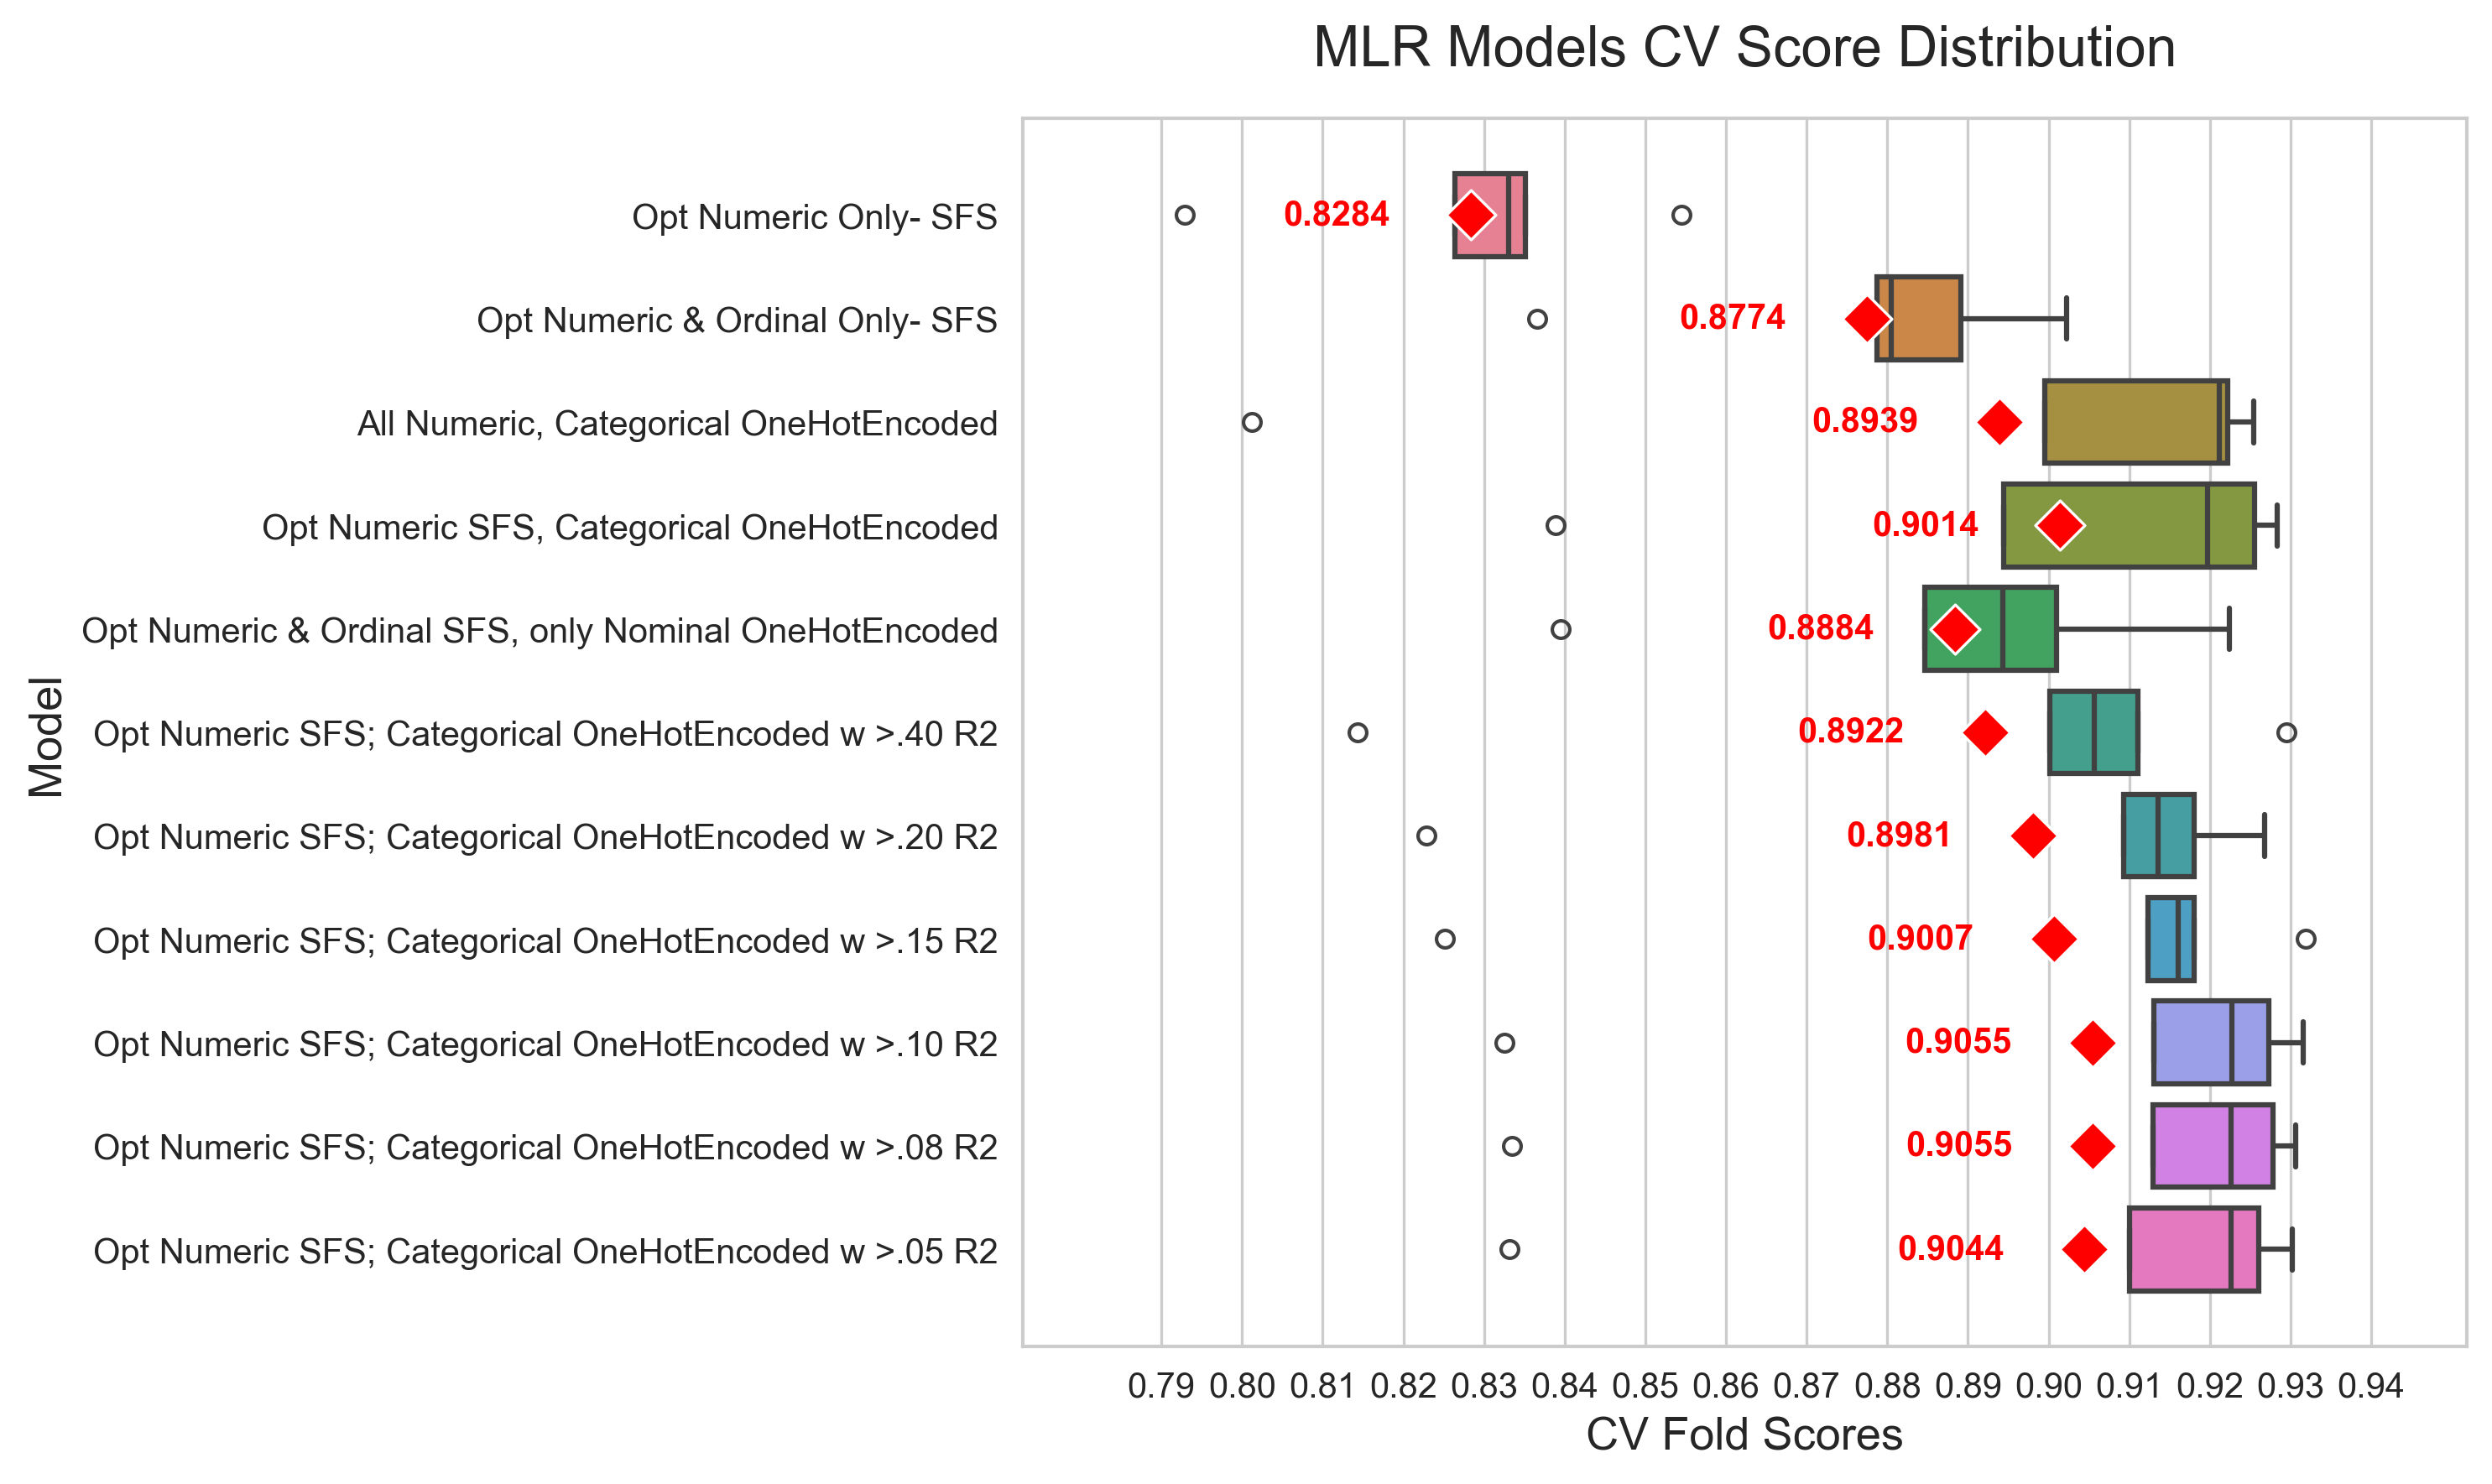

In [85]:
BoxPlotComparison(ALL_MODEL_RESULTS_MLRonly_preENG, 'MLR Models')

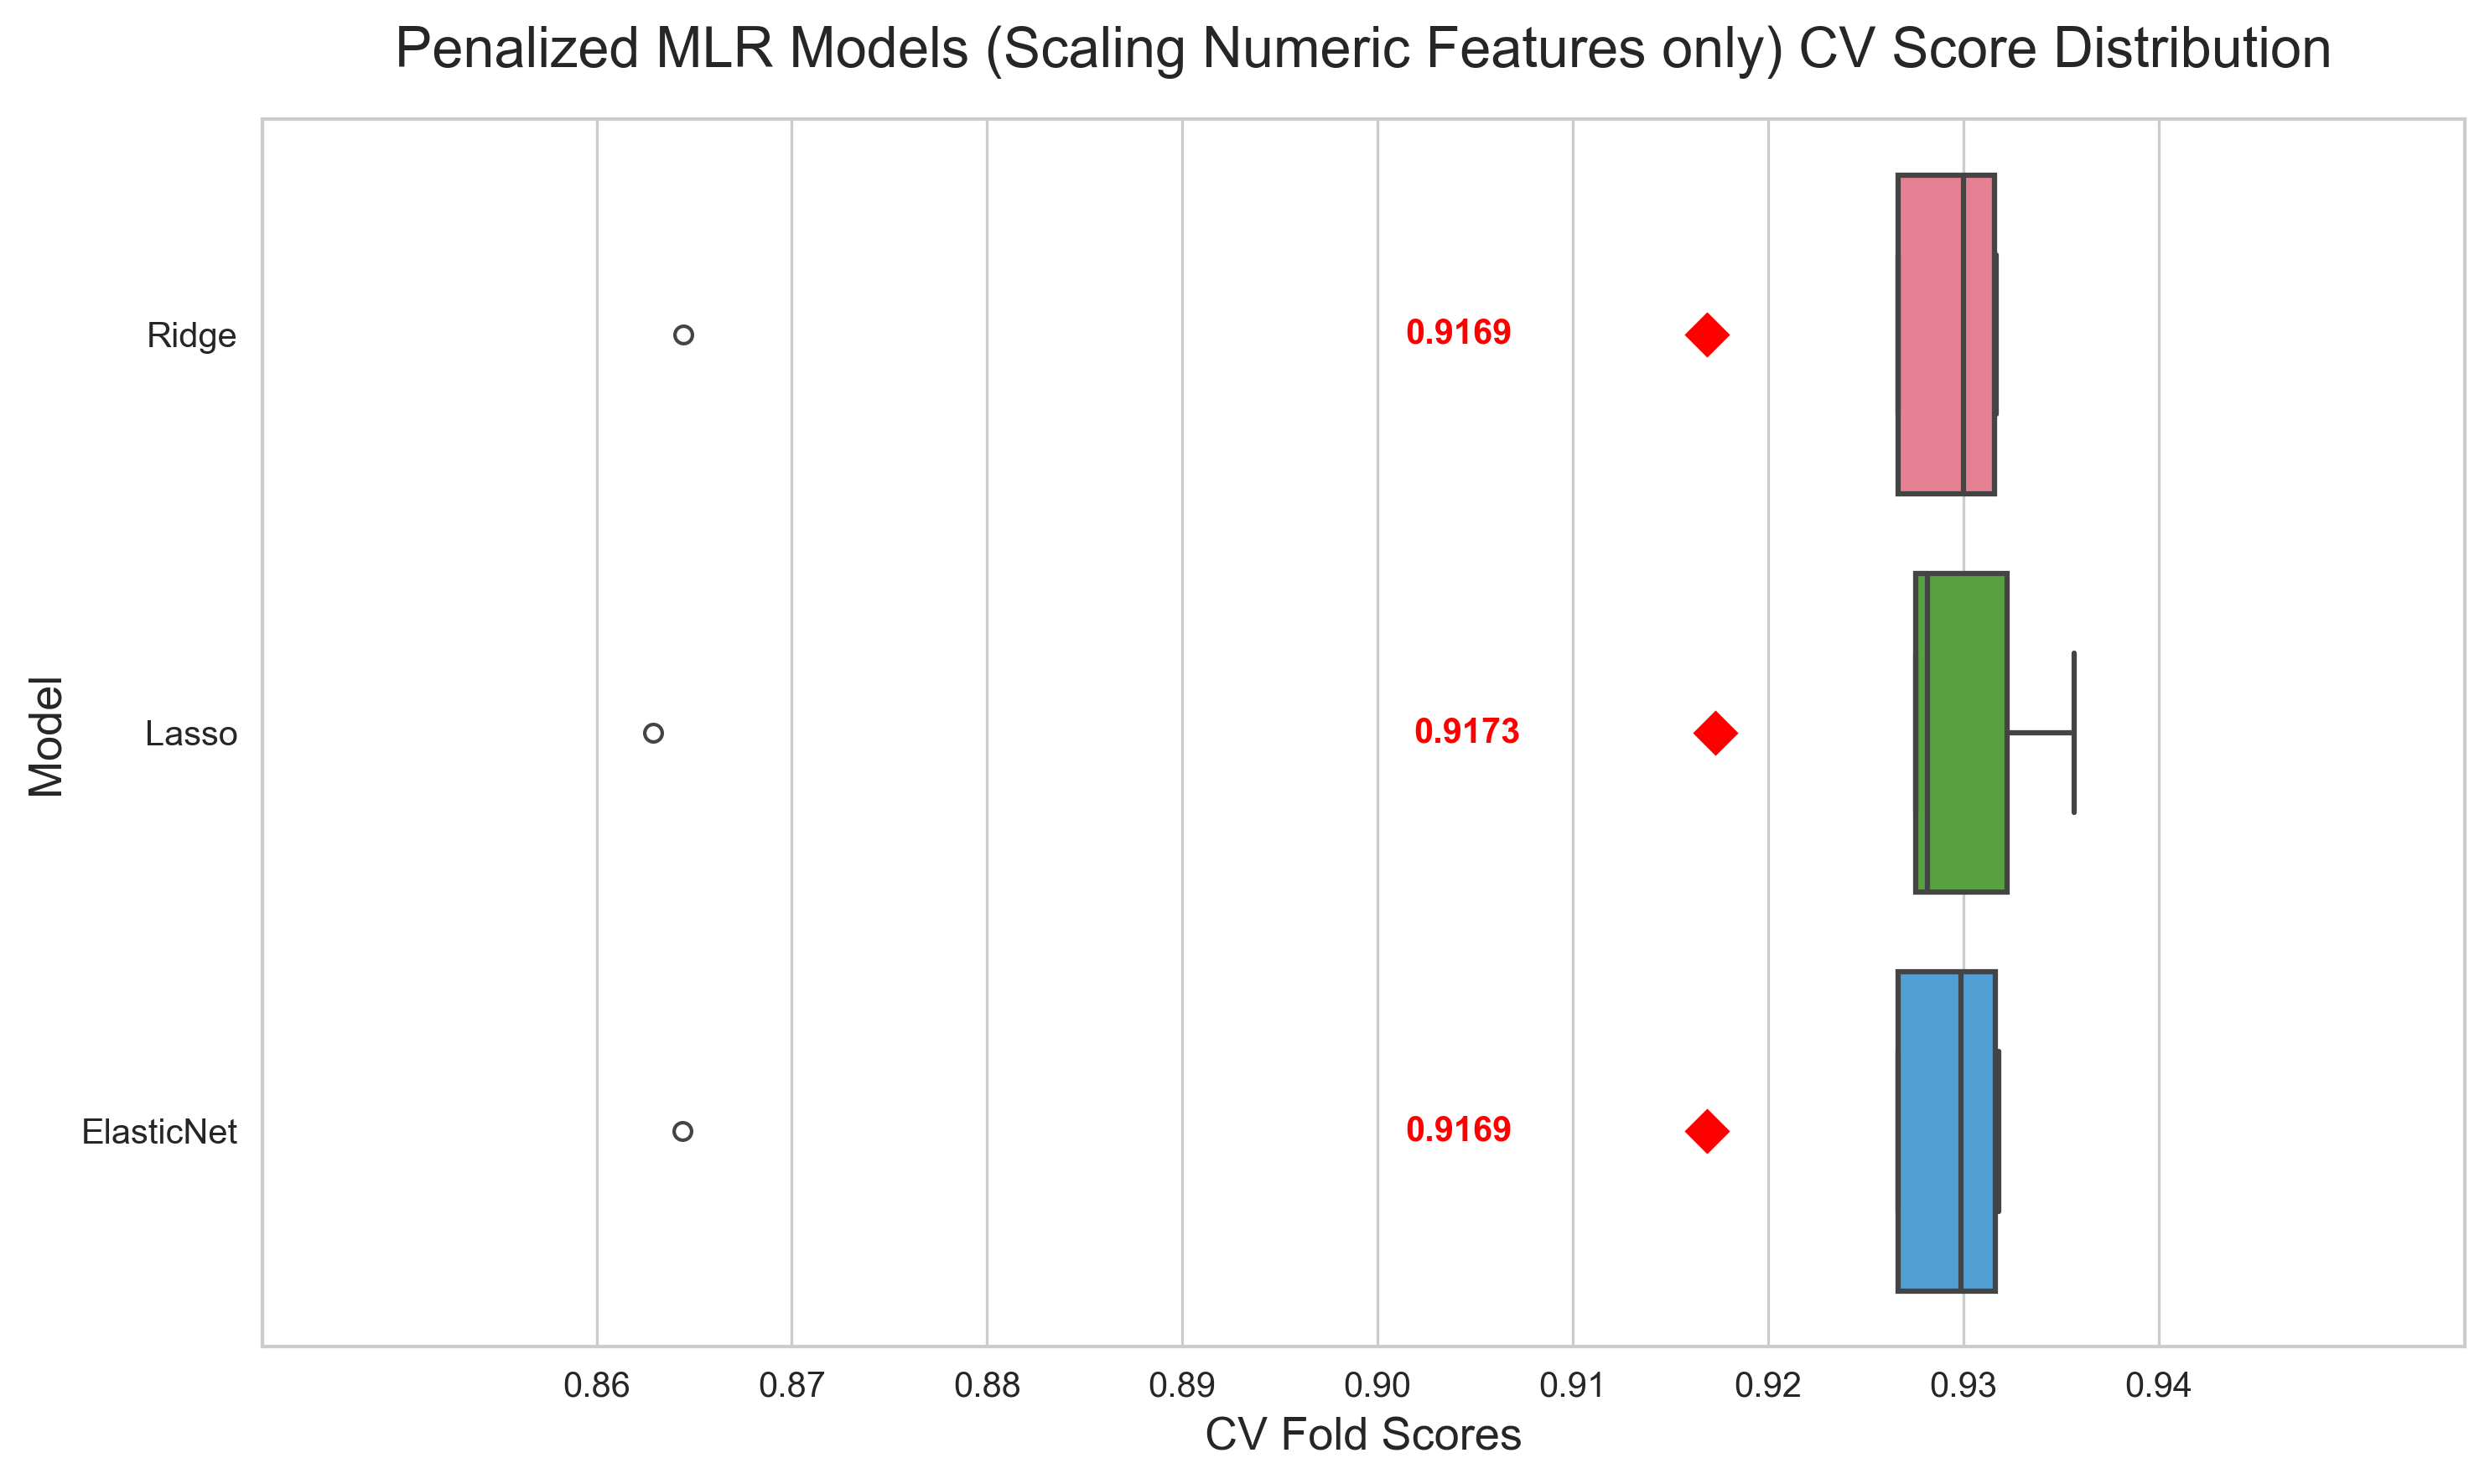

In [86]:
BoxPlotComparison(ALL_MODEL_RESULTS_PenalizedMLRonly_preENG_XNumeric, 'Penalized MLR Models (Scaling Numeric Features only)')

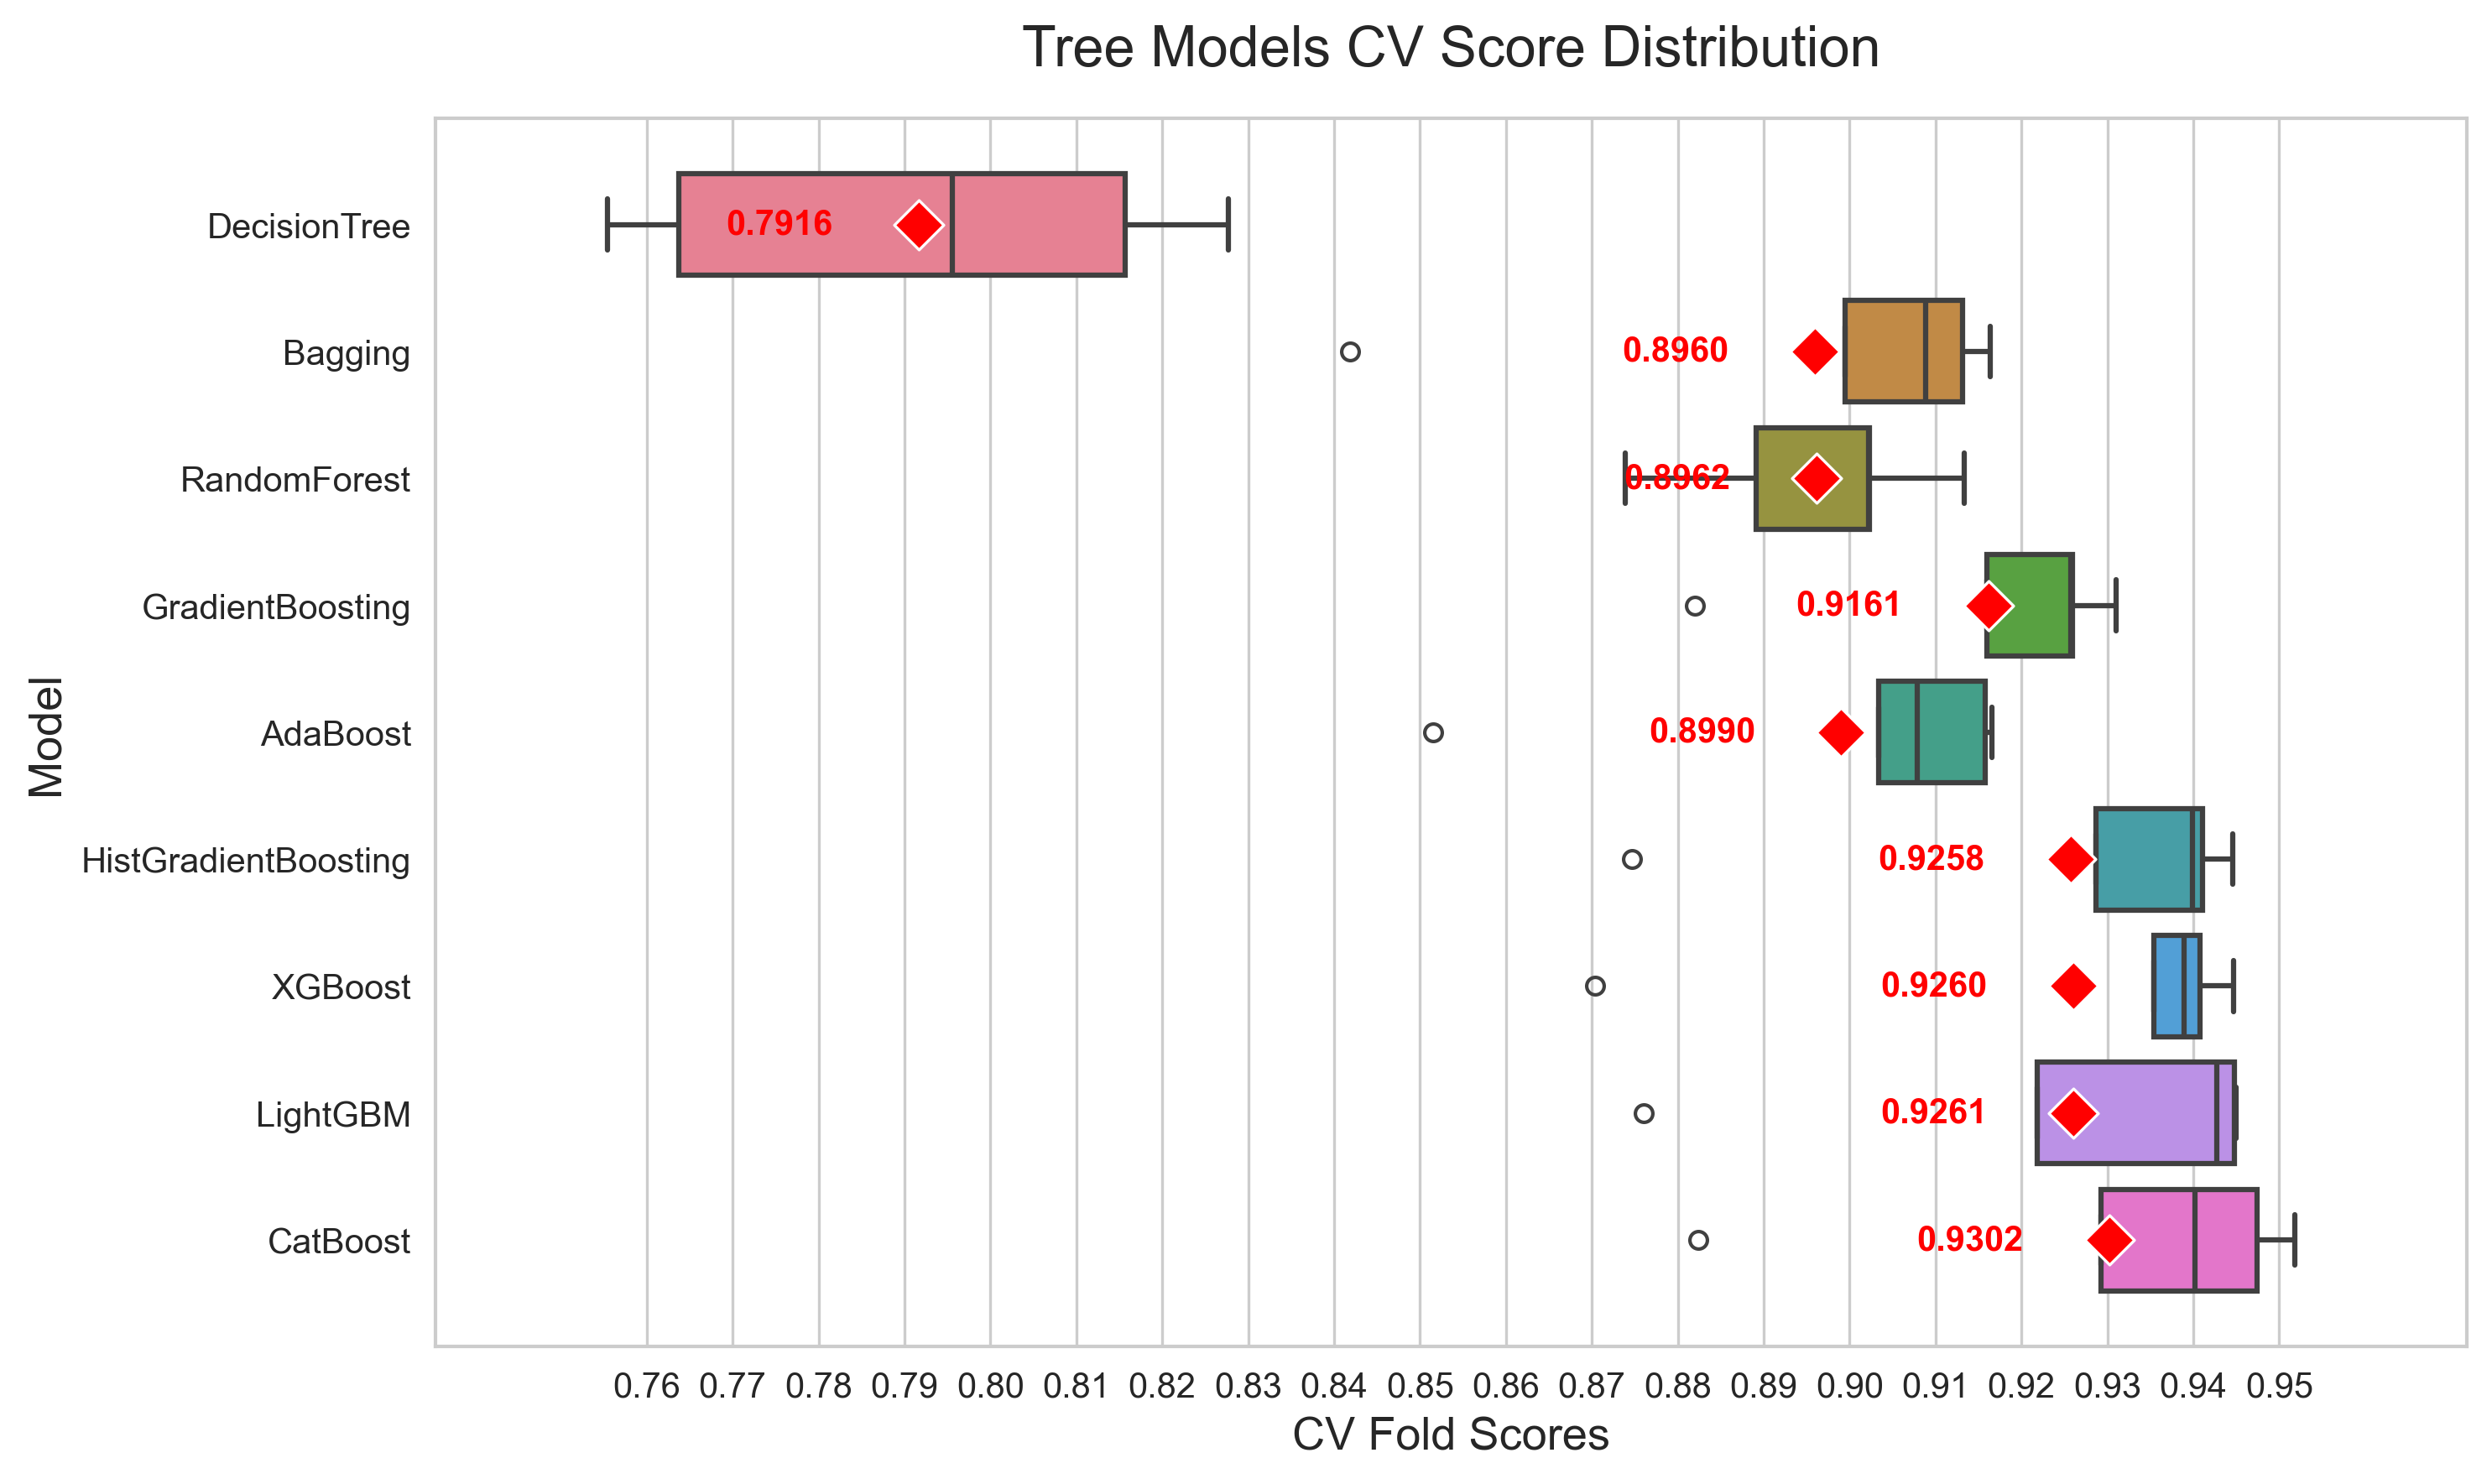

In [87]:
BoxPlotComparison(ALL_MODEL_RESULTS_TreeOnly_preENG, 'Tree Models')

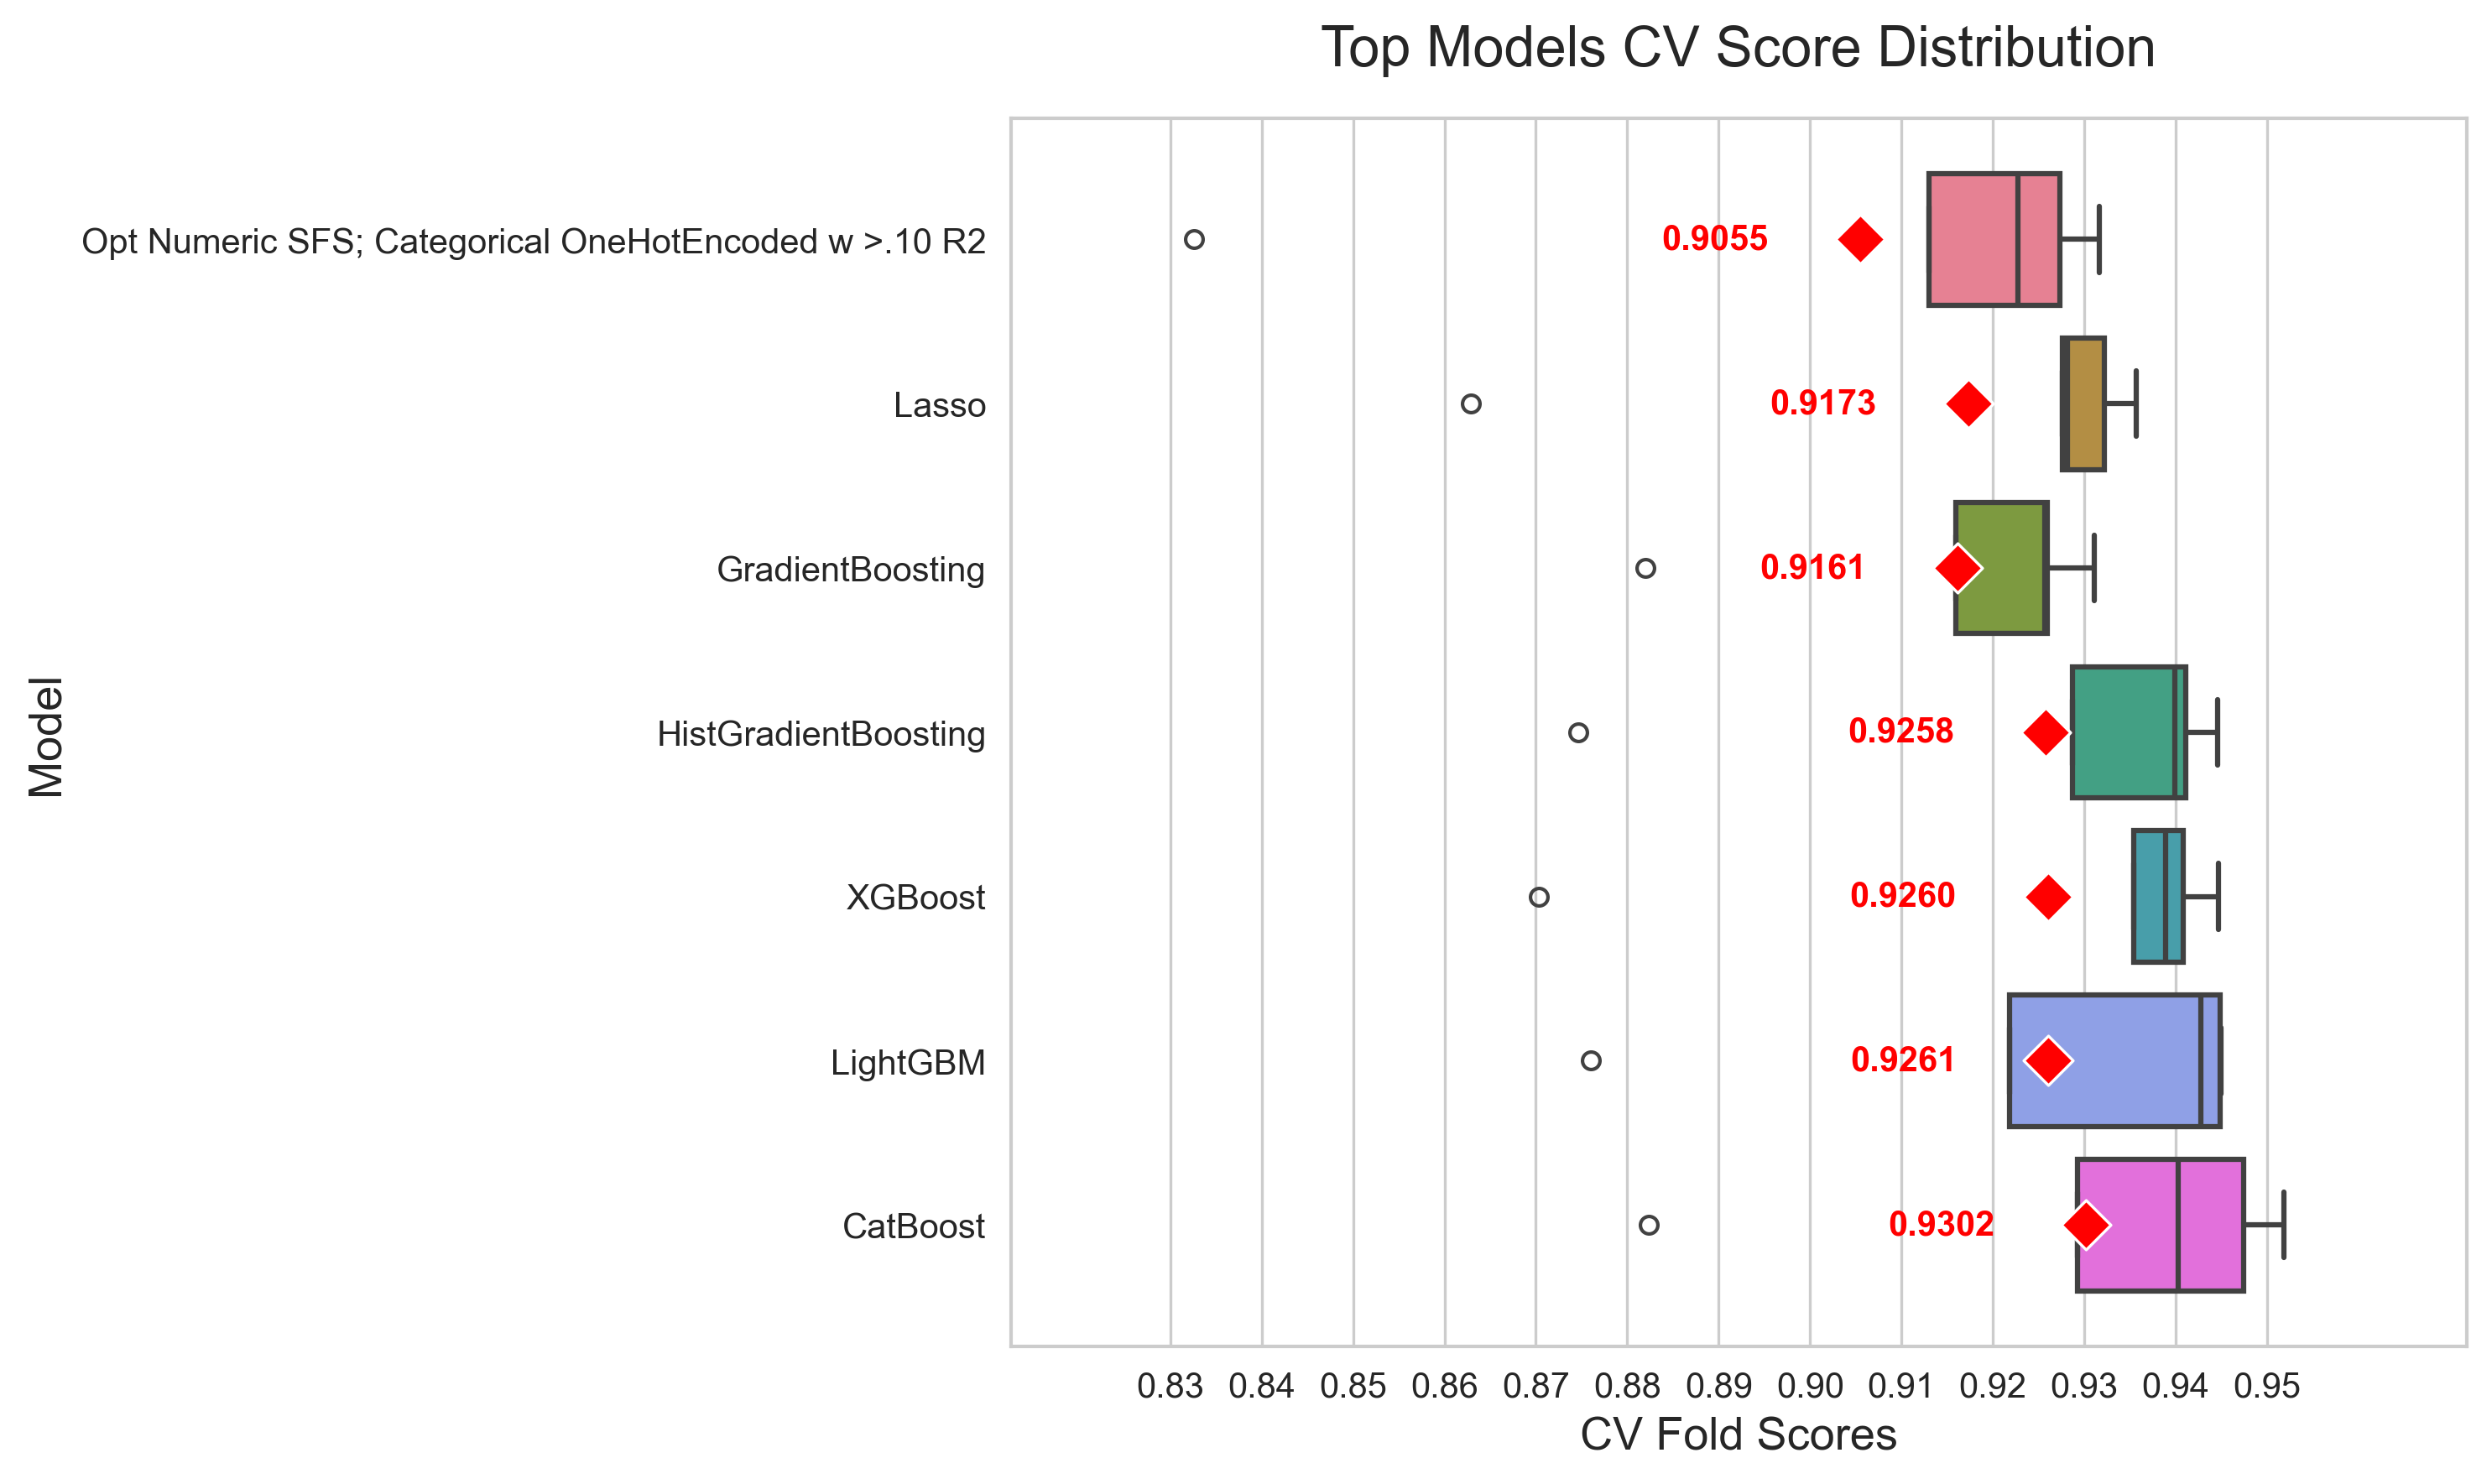

In [103]:
BoxPlotComparison(ALL_MODEL_RESULTS_TOP_preEng, 'Top Models')

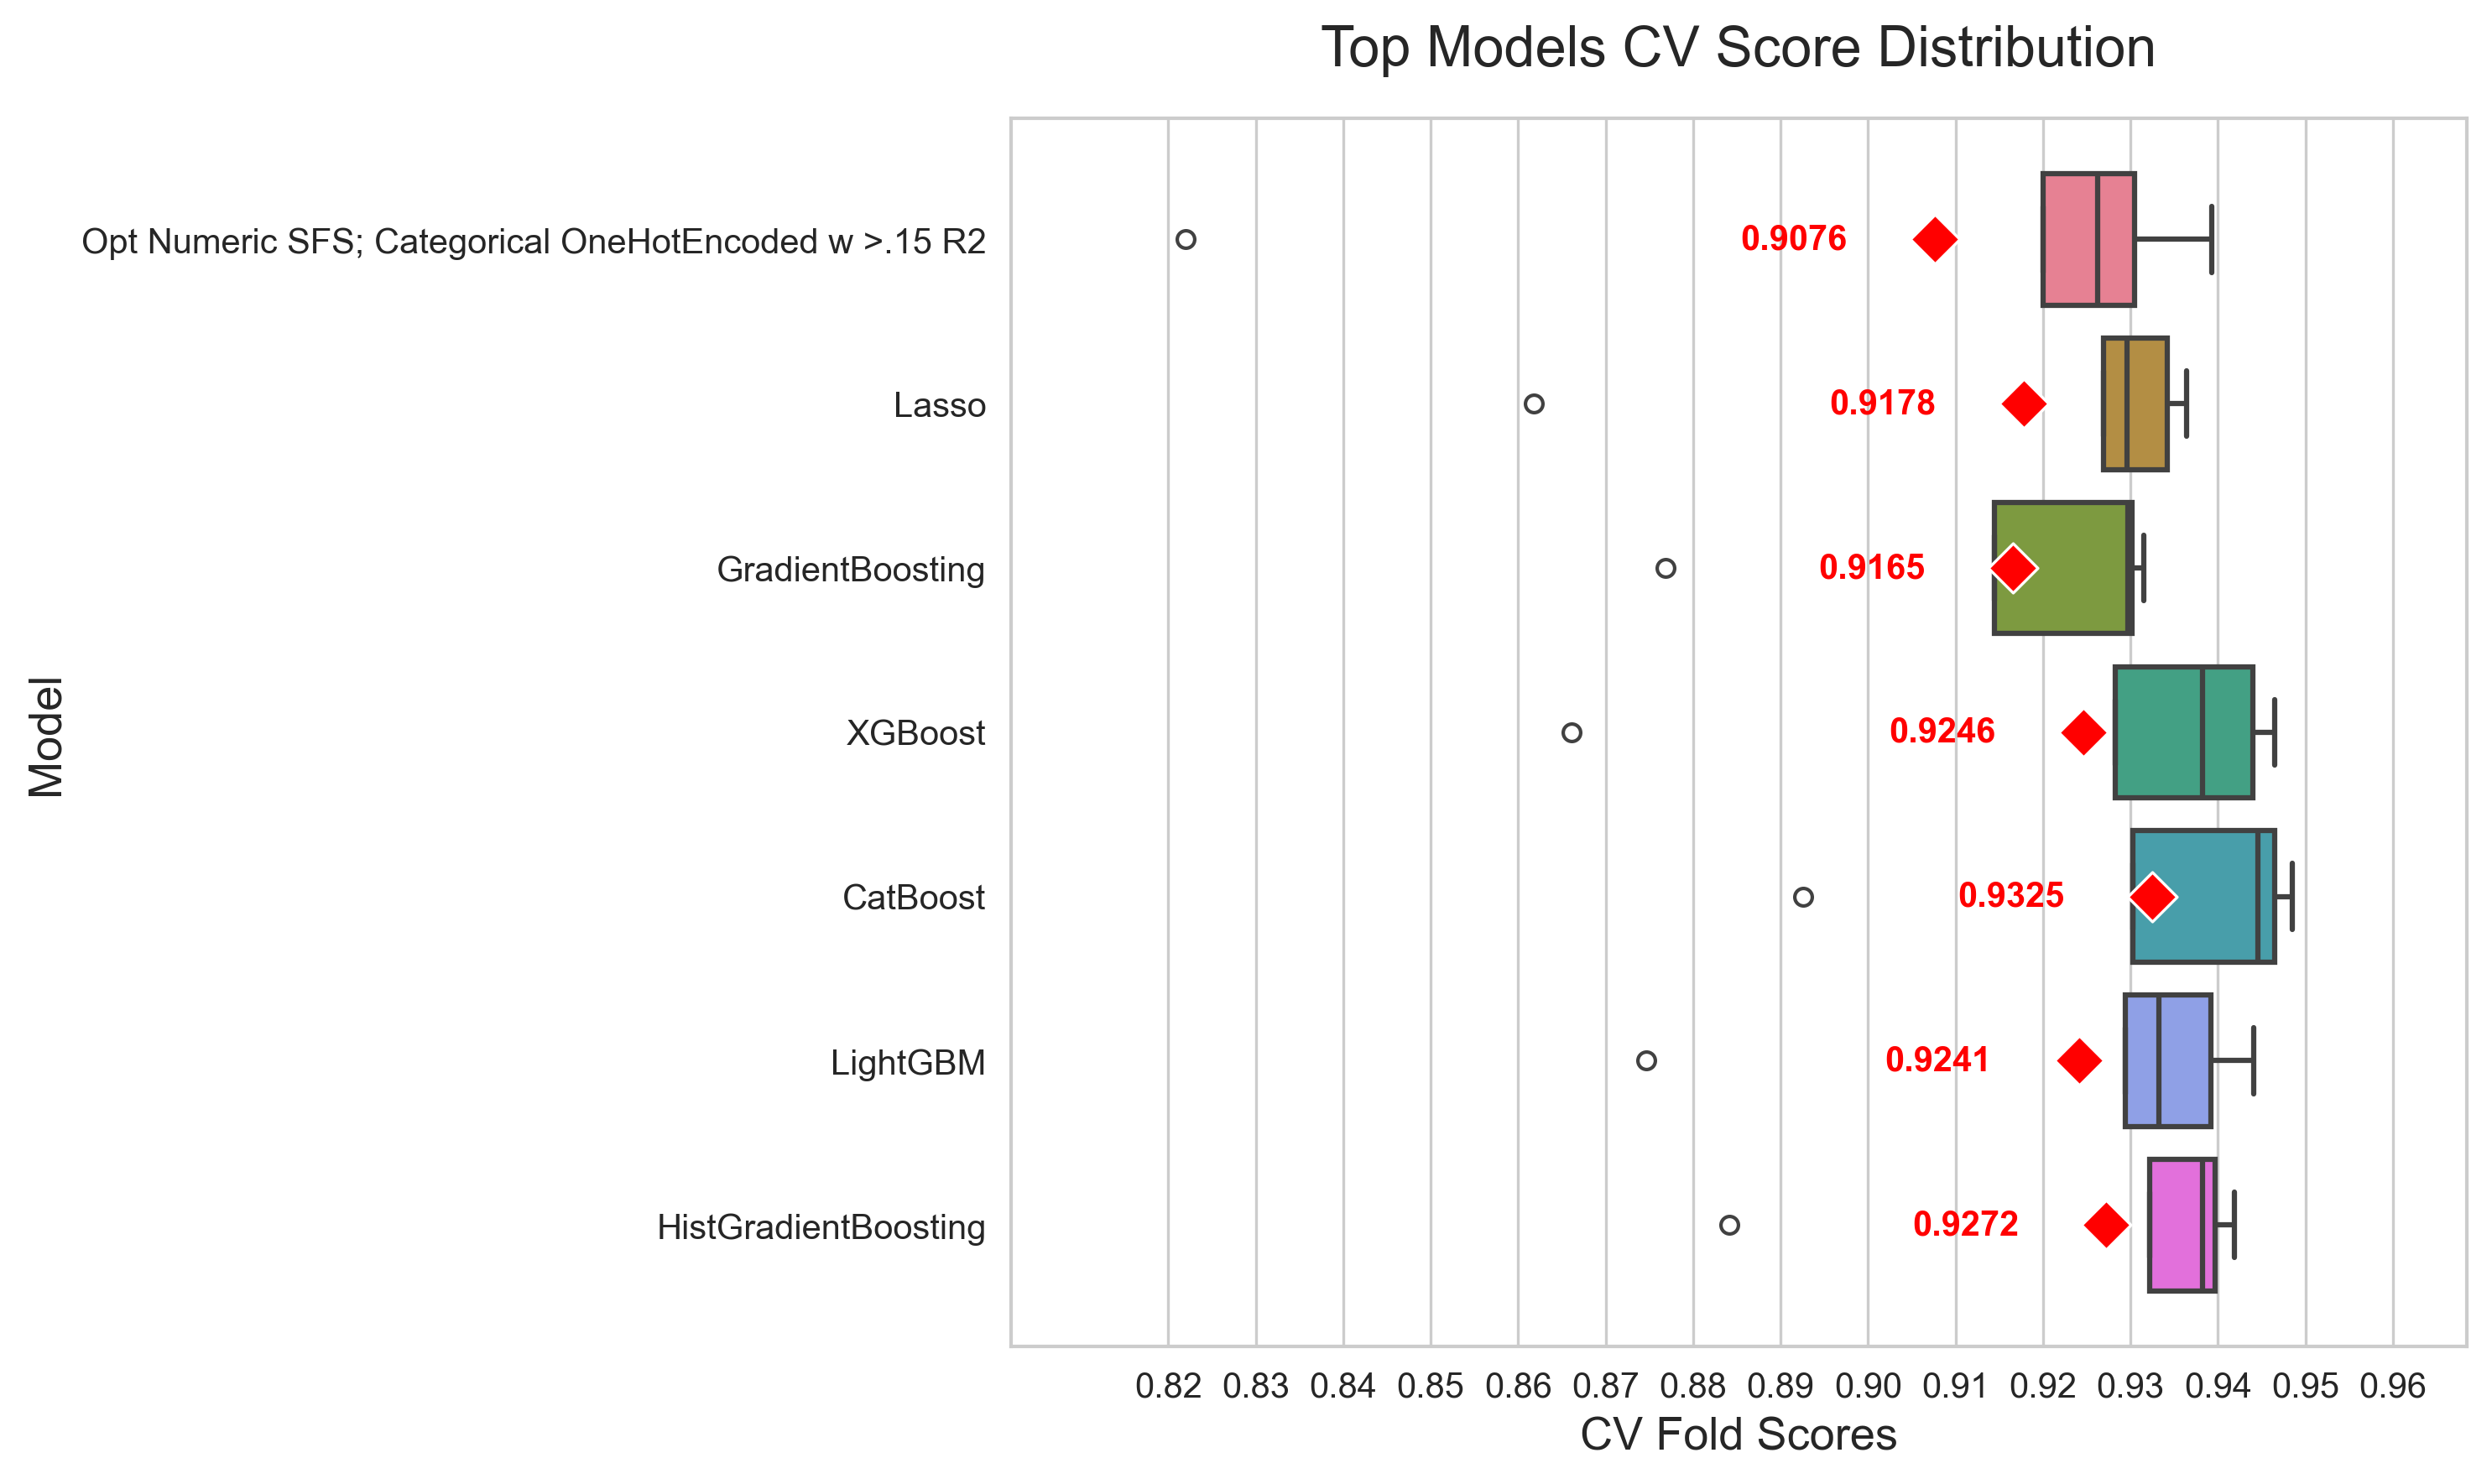

In [104]:
BoxPlotComparison(ALL_MODEL_RESULTS_TOP_postEng, 'Top Models')

In [ ]:
#Bar Comparison of Pre vs Post Engineering
